# **Índices por tipo de Administração**

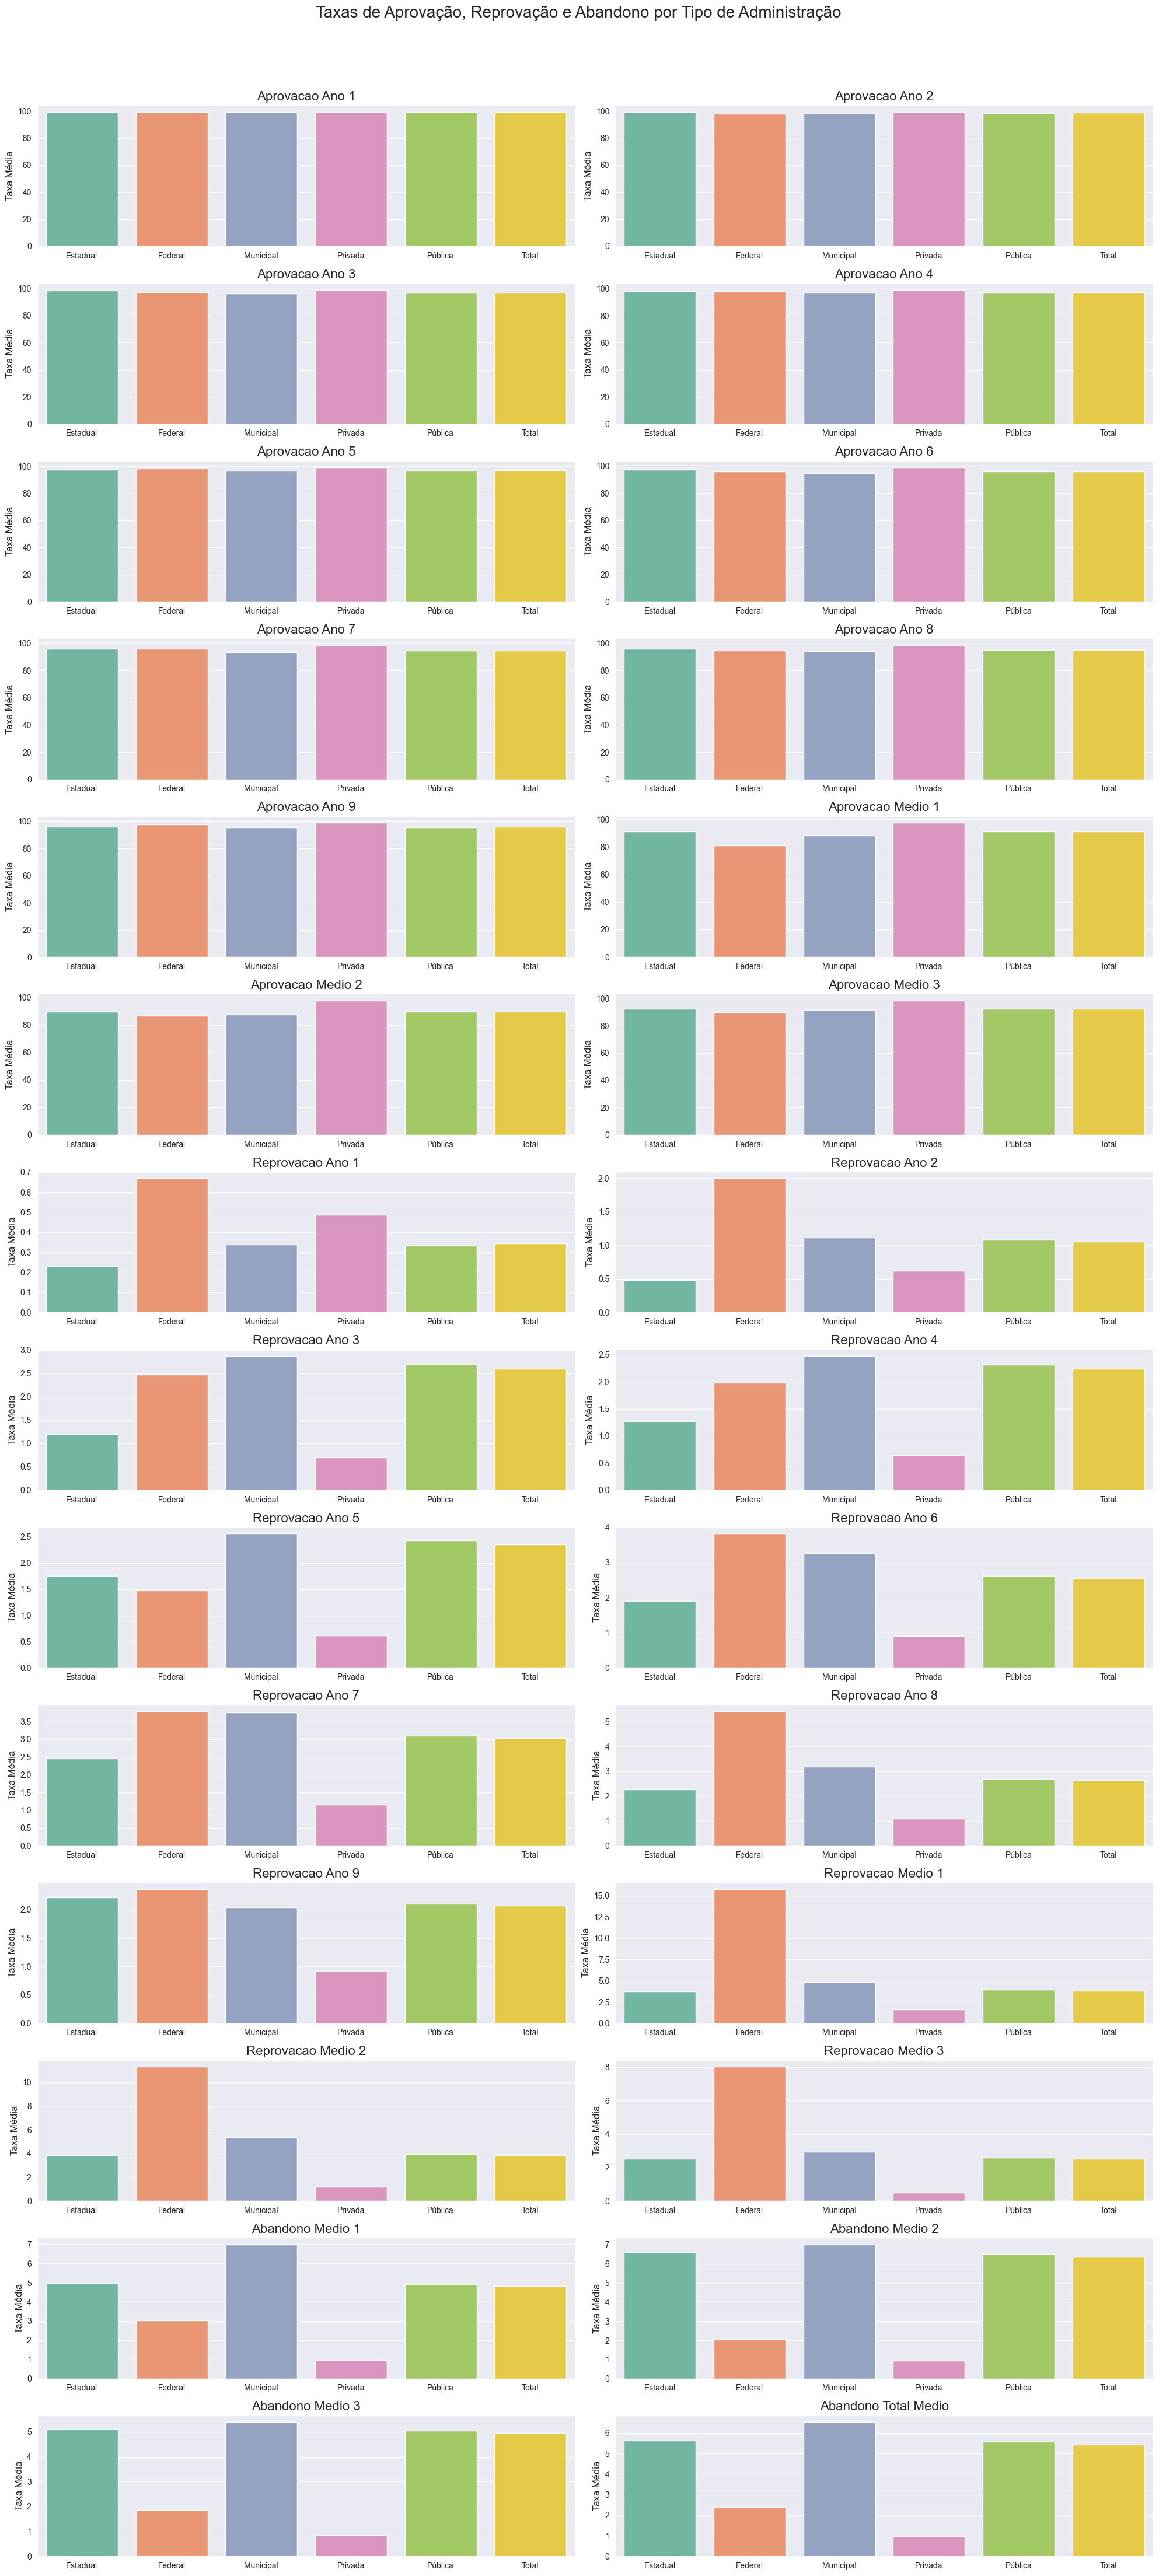

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados de SAEB
saeb_df = pd.read_csv('../data/saeb_data_2021.csv', delimiter=';', encoding='UTF-8', dtype={
    'NU_ANO_SAEB': 'str',
    'REGIAO': 'str',
    'CO_UF': 'str',
    'CO_MUNICIPIO': 'str',
    'NO_MUNICIPIO': 'str',
    'TP_LOCALIZACAO': 'str',
    'DP_ADIMINSTRATIVA': 'str',
    'APROVACAO_ANO_1': 'float',
    'APROVACAO_ANO_2': 'float',
    'APROVACAO_ANO_3': 'float',
    'APROVACAO_ANO_4': 'float',
    'APROVACAO_ANO_5': 'float',
    'APROVACAO_ANO_6': 'float',
    'APROVACAO_ANO_7': 'float',
    'APROVACAO_ANO_8': 'float',
    'APROVACAO_ANO_9': 'float',
    'APROVACAO_MEDIO_1': 'float',
    'APROVACAO_MEDIO_2': 'float',
    'APROVACAO_MEDIO_3': 'float',
    'REPROVACAO_ANO_1': 'float',
    'REPROVACAO_ANO_2': 'float',
    'REPROVACAO_ANO_3': 'float',
    'REPROVACAO_ANO_4': 'float',
    'REPROVACAO_ANO_5': 'float',
    'REPROVACAO_ANO_6': 'float',
    'REPROVACAO_ANO_7': 'float',
    'REPROVACAO_ANO_8': 'float',
    'REPROVACAO_ANO_9': 'float',
    'REPROVACAO_MEDIO_1': 'float', 
    'REPROVACAO_MEDIO_2': 'float', 
    'REPROVACAO_MEDIO_3': 'float',                                                  
    'ABANDONO_MEDIO_1': 'float', 
    'ABANDONO_MEDIO_2': 'float', 
    'ABANDONO_MEDIO_3': 'float',
     'ABANDONO_TOTAL_MEDIO': 'float'
})

# Agrupar por tipo de administração e calcular a média
admin_stats = saeb_df.groupby('DP_ADIMINSTRATIVA')[[
    'APROVACAO_ANO_1', 'APROVACAO_ANO_2', 'APROVACAO_ANO_3', 'APROVACAO_ANO_4',
    'APROVACAO_ANO_5', 'APROVACAO_ANO_6', 'APROVACAO_ANO_7', 'APROVACAO_ANO_8',
    'APROVACAO_ANO_9', 'APROVACAO_MEDIO_1', 'APROVACAO_MEDIO_2', 'APROVACAO_MEDIO_3',
    'REPROVACAO_ANO_1', 'REPROVACAO_ANO_2', 'REPROVACAO_ANO_3', 'REPROVACAO_ANO_4',
    'REPROVACAO_ANO_5', 'REPROVACAO_ANO_6', 'REPROVACAO_ANO_7', 'REPROVACAO_ANO_8',
    'REPROVACAO_ANO_9', 'REPROVACAO_MEDIO_1', 'REPROVACAO_MEDIO_2', 'REPROVACAO_MEDIO_3',
    'ABANDONO_MEDIO_1', 'ABANDONO_MEDIO_2', 'ABANDONO_MEDIO_3',  'ABANDONO_TOTAL_MEDIO']].mean().reset_index()

# Configurar paleta de cores predefinida
preset_palette = "Set2"  

# Configurar a grade de subplots (9 linhas x 3 colunas)
fig, axes = plt.subplots(14, 2, figsize=(20, 45), sharey=False)
fig.suptitle('Taxas de Aprovação, Reprovação e Abandono por Tipo de Administração', fontsize=20)

# Listas de variáveis para facilitar a plotagem
columns = ['APROVACAO_ANO_1', 'APROVACAO_ANO_2', 'APROVACAO_ANO_3', 'APROVACAO_ANO_4', 
           'APROVACAO_ANO_5', 'APROVACAO_ANO_6', 'APROVACAO_ANO_7', 'APROVACAO_ANO_8', 
           'APROVACAO_ANO_9', 'APROVACAO_MEDIO_1', 'APROVACAO_MEDIO_2', 'APROVACAO_MEDIO_3',
           'REPROVACAO_ANO_1', 'REPROVACAO_ANO_2', 'REPROVACAO_ANO_3', 'REPROVACAO_ANO_4', 
           'REPROVACAO_ANO_5', 'REPROVACAO_ANO_6', 'REPROVACAO_ANO_7', 'REPROVACAO_ANO_8', 
           'REPROVACAO_ANO_9', 'REPROVACAO_MEDIO_1', 'REPROVACAO_MEDIO_2', 'REPROVACAO_MEDIO_3',
           'ABANDONO_MEDIO_1', 'ABANDONO_MEDIO_2', 'ABANDONO_MEDIO_3',  'ABANDONO_TOTAL_MEDIO']

for i, col in enumerate(columns):
    sns.barplot(ax=axes[i//2, i%2], x='DP_ADIMINSTRATIVA', y=col, data=admin_stats, palette=preset_palette, hue='DP_ADIMINSTRATIVA', dodge=False)
    axes[i//2, i%2].set_title(f'{col.replace("_", " ").title()}', fontsize=16)
    axes[i//2, i%2].set_ylabel('Taxa Média', fontsize=12)
    axes[i//2, i%2].set_xlabel('', fontsize=14)

# Ajustar o espaçamento entre linhas e colunas
plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Maior espaçamento entre as linhas e colunas
plt.tight_layout(rect=[0, 0, 1, 0.96])      # Ajustar layout para evitar sobreposição do título principal

plt.show()


## **Matriz de correlação níveis de reda e taxas de reprovação e abandono**

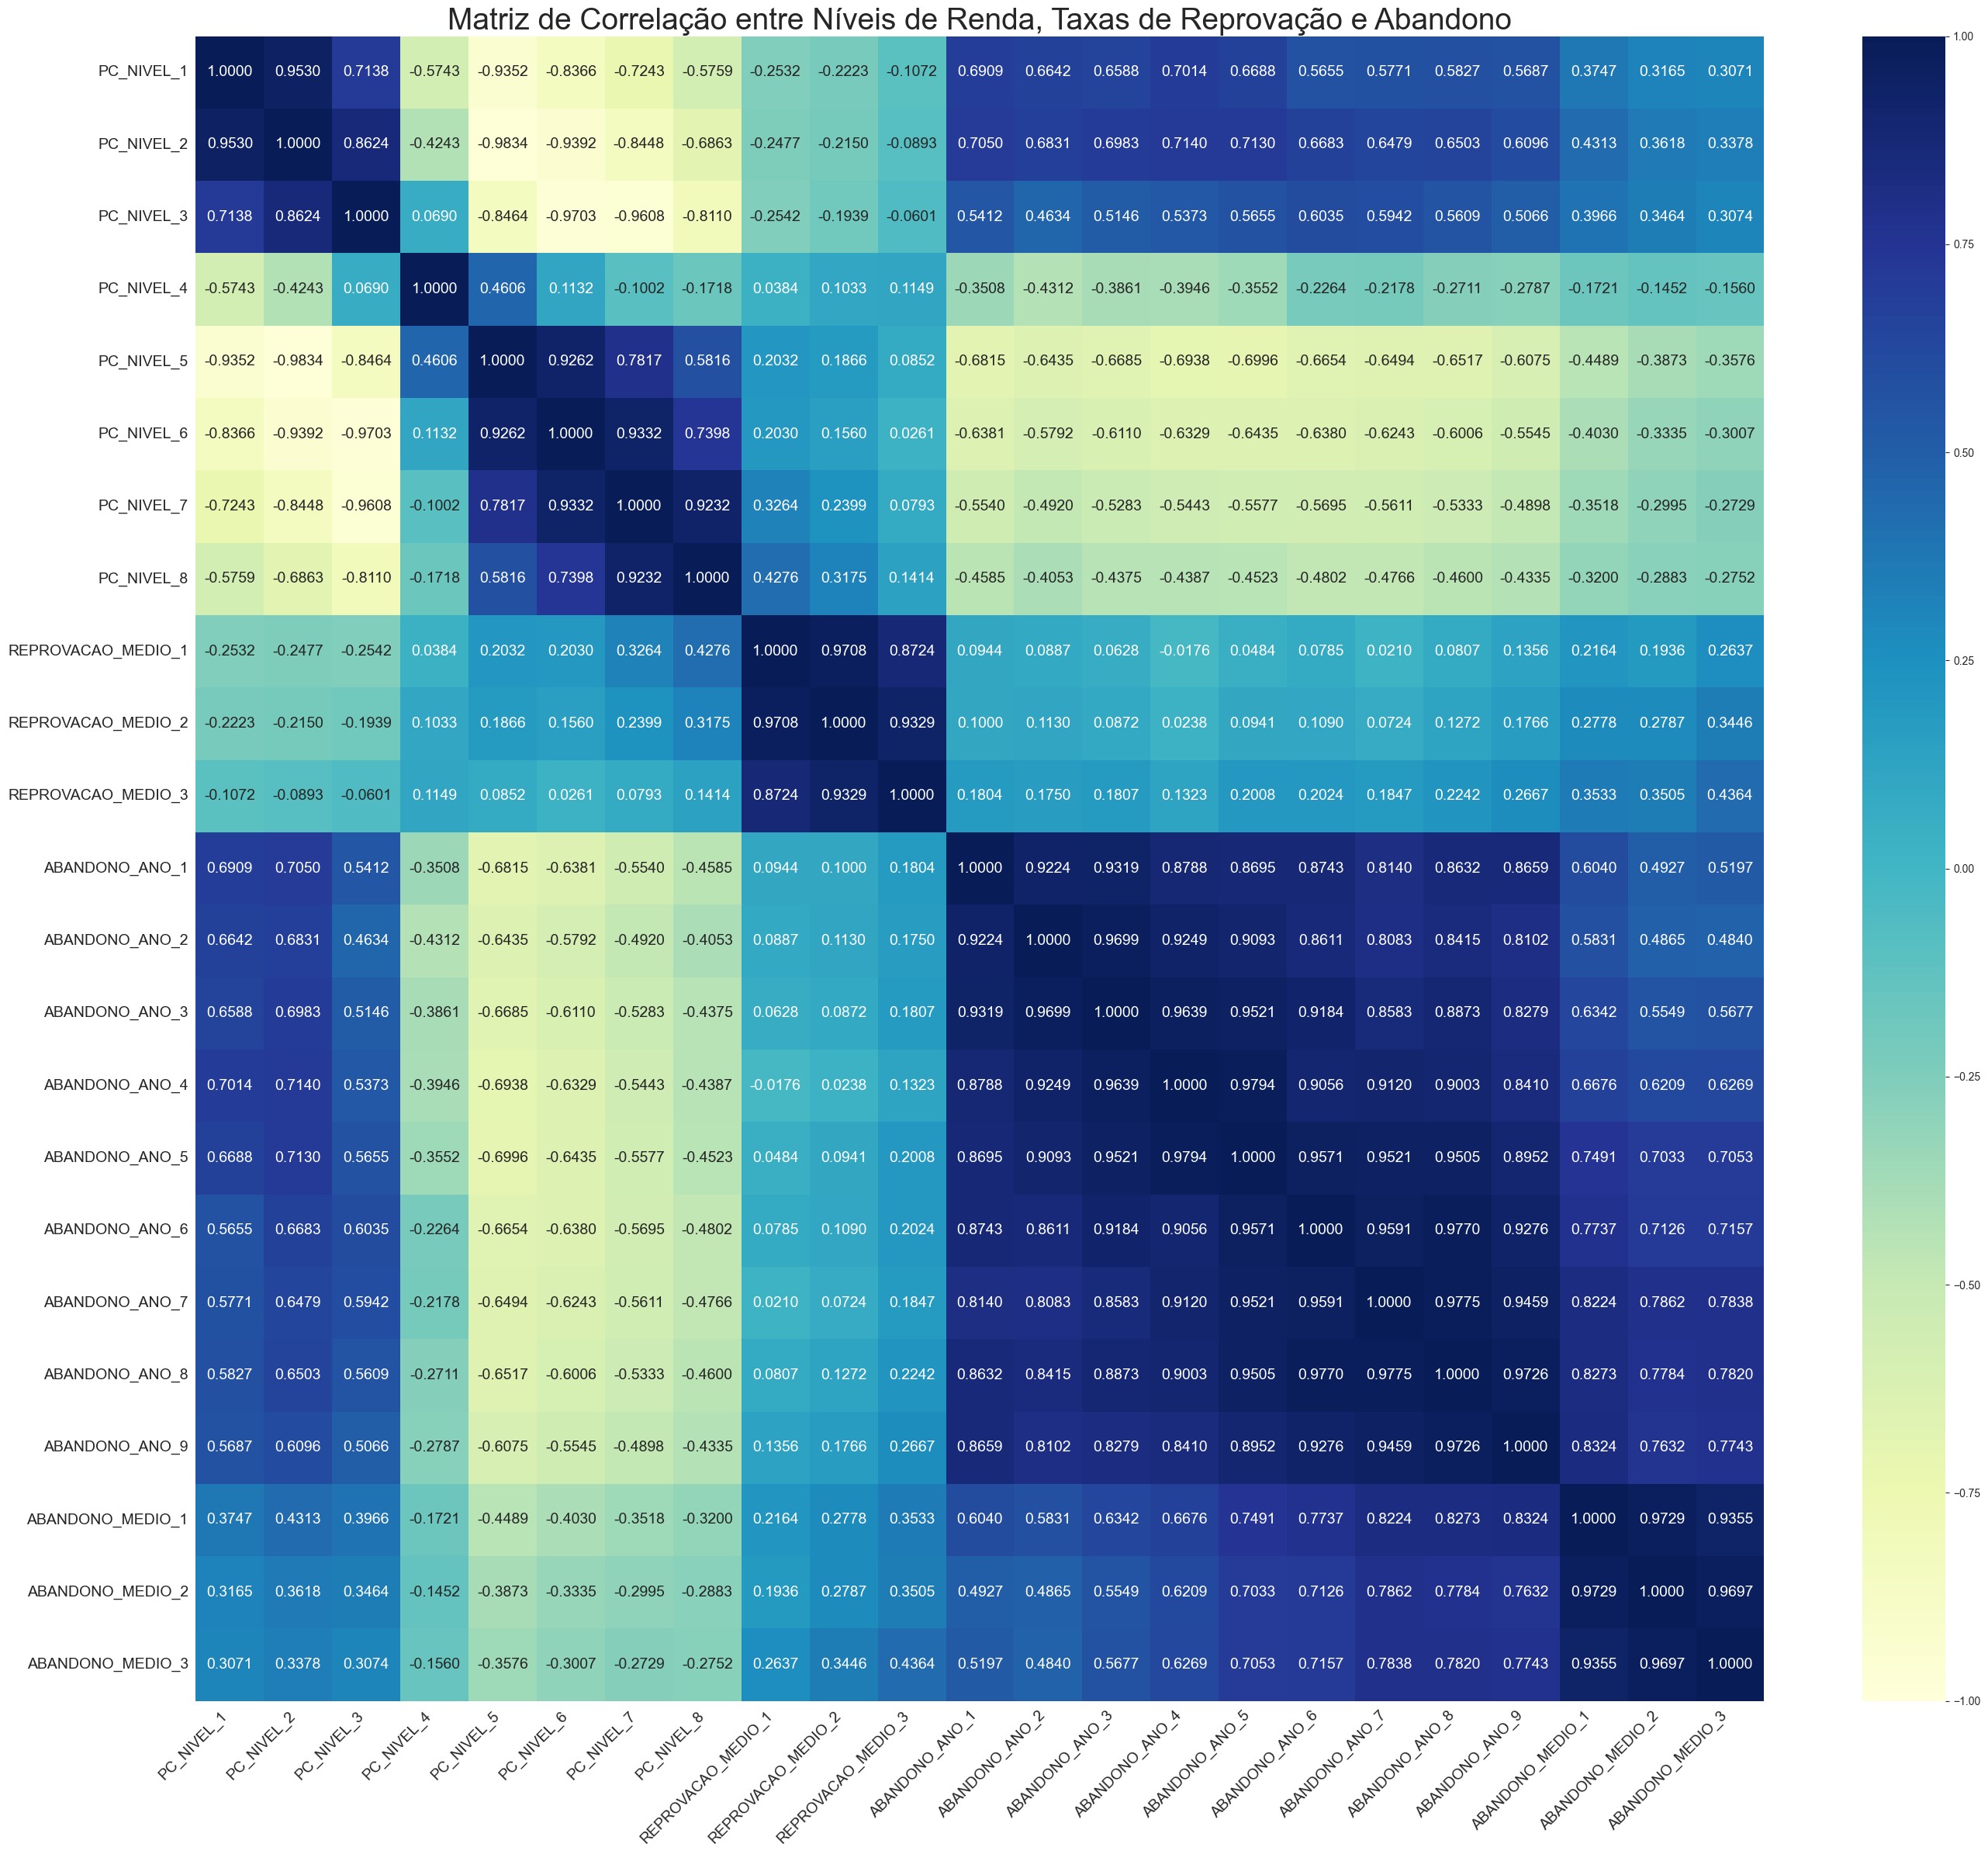

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers(df, columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]
    return df


# Carregar e limpar os dados
saeb_df = pd.read_csv('../data/saeb_data_2021.csv', delimiter=';', encoding='UTF-8', dtype={
   'NU_ANO_SAEB': 'str',
    'REGIAO': 'str',
    'CO_UF': 'str',
    'CO_MUNICIPIO': 'str',
    'NO_MUNICIPIO': 'str',
    'TP_LOCALIZACAO': 'str',
    'DP_ADIMINSTRATIVA': 'str',
    'APROVACAO_TOTAL_FUNDAMENTAL': 'float',
    'APROVACAO_ANOS_INICIAIS': 'float',
    'APROVACAO_ANOS_FINAIS': 'float',
    'APROVACAO_ANO_1': 'float',
    'APROVACAO_ANO_2': 'float',
    'APROVACAO_ANO_3': 'float',
    'APROVACAO_ANO_4': 'float',
    'APROVACAO_ANO_5': 'float',
    'APROVACAO_ANO_6': 'float',
    'APROVACAO_ANO_7': 'float',
    'APROVACAO_ANO_8': 'float',
    'APROVACAO_ANO_9': 'float',
    'APROVACAO_TOTAL_MEDIO': 'float',
    'APROVACAO_MEDIO_1': 'float',
    'APROVACAO_MEDIO_2': 'float',
    'APROVACAO_MEDIO_3': 'float',
    'REPROVACAO_TOTAL_FUNDAMENTAL': 'float',
    'REPROVACAO_ANOS_INICIAIS': 'float',
    'REPROVACAO_ANOS_FINAIS': 'float',
    'REPROCACAO_ANO_1': 'float',
    'REPROVACAO_ANO_2': 'float',
    'REPROVACAO_ANO_3': 'float',
    'REPROVACAO_ANO_4': 'float',
    'REPROVACAO_ANO_5': 'float',
    'REPROVACAO_ANO_6': 'float',
    'REPROVACAO_ANO_7': 'float',
    'REPROVACAO_ANO_8': 'float',
    'REPROVACAO_ANO_9': 'float',
    'REPROVACAO_TOTAL_MEDIO': 'float',
    'REPROVACAO_MEDIO_1': 'float',
    'REPROVACAO_MEDIO_2': 'float',
    'REPROVACAO_MEDIO_3': 'float',
    'ABANDONO_TOTAL_FUNDAMENTAL': 'float',
    'ABANDONO_ANOS_INICIAIS': 'float',
    'ABANDONO_ANOS_FINAIS': 'float',
    'ABANDONO_ANO_1': 'float',
    'ABANDONO_ANO_2': 'float',
    'ABANDONO_ANO_3': 'float',
    'ABANDONO_ANO_4': 'float',
    'ABANDONO_ANO_5': 'float',
    'ABANDONO_ANO_6': 'float',
    'ABANDONO_ANO_7': 'float',
    'ABANDONO_ANO_8': 'float',
    'ABANDONO_ANO_9': 'float',
    'ABANDONO_TOTAL_MEDIO': 'float',
    'ABANDONO_MEDIO_1': 'float',
    'ABANDONO_MEDIO_2': 'float',
    'ABANDONO_MEDIO_3': 'float'
})

inse_df = pd.read_csv('../data/inse_data_2021.csv', delimiter=';', encoding='UTF-8', dtype={
    'SG_UF': 'str',
    'PC_NIVEL_1': 'float',
    'PC_NIVEL_2': 'float',
    'PC_NIVEL_3': 'float',
    'PC_NIVEL_4': 'float',
    'PC_NIVEL_5': 'float',
    'PC_NIVEL_6': 'float',
    'PC_NIVEL_7': 'float',
    'PC_NIVEL_8': 'float'
})


saeb_uf = saeb_df.groupby('CO_UF')[[
    'APROVACAO_ANO_1', 'APROVACAO_ANO_2', 'APROVACAO_ANO_3', 'APROVACAO_ANO_4',
    'APROVACAO_ANO_5', 'APROVACAO_ANO_6', 'APROVACAO_ANO_7', 'APROVACAO_ANO_8',
    'APROVACAO_ANO_9', 'APROVACAO_MEDIO_1', 'APROVACAO_MEDIO_2', 'APROVACAO_MEDIO_3',
    'REPROVACAO_ANO_1', 'REPROVACAO_ANO_2', 'REPROVACAO_ANO_3', 'REPROVACAO_ANO_4',
    'REPROVACAO_ANO_5', 'REPROVACAO_ANO_6', 'REPROVACAO_ANO_7', 'REPROVACAO_ANO_8',
    'REPROVACAO_ANO_9', 'REPROVACAO_MEDIO_1', 'REPROVACAO_MEDIO_2', 'REPROVACAO_MEDIO_3',
    'ABANDONO_ANO_1', 'ABANDONO_ANO_2', 'ABANDONO_ANO_3', 'ABANDONO_ANO_4','ABANDONO_ANO_5',
    'ABANDONO_ANO_6', 'ABANDONO_ANO_7', 'ABANDONO_ANO_8','ABANDONO_ANO_9',
    'ABANDONO_MEDIO_1', 'ABANDONO_MEDIO_2', 'ABANDONO_MEDIO_3']].mean().reset_index()


saeb_uf.to_csv('saeb_uf.csv', index=False, encoding='utf-8')

inse_uf = inse_df.groupby('SG_UF')[['PC_NIVEL_1','PC_NIVEL_2','PC_NIVEL_3','PC_NIVEL_4','PC_NIVEL_5','PC_NIVEL_6','PC_NIVEL_7','PC_NIVEL_8']].mean().reset_index()

inse_uf.to_csv('inse_uf.csv', index=False, encoding='utf-8')

merged_df = pd.merge(saeb_uf, inse_uf[['SG_UF', 'PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3' , 'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7' , 'PC_NIVEL_8']],  left_on='CO_UF', right_on='SG_UF')


merged_df.to_csv('merged_uf.csv', index=False, encoding='utf-8')

correlation_data = merged_df[['PC_NIVEL_1','PC_NIVEL_2','PC_NIVEL_3','PC_NIVEL_4',
                              'PC_NIVEL_5','PC_NIVEL_6','PC_NIVEL_7','PC_NIVEL_8', 
                              'REPROVACAO_MEDIO_1', 'REPROVACAO_MEDIO_2', 'REPROVACAO_MEDIO_3',
                              'ABANDONO_ANO_1', 'ABANDONO_ANO_2', 'ABANDONO_ANO_3', 
                              'ABANDONO_ANO_4', 'ABANDONO_ANO_5', 'ABANDONO_ANO_6',
                              'ABANDONO_ANO_7', 'ABANDONO_ANO_8', 'ABANDONO_ANO_9',
                              'ABANDONO_MEDIO_1', 'ABANDONO_MEDIO_2', 'ABANDONO_MEDIO_3']]


correlation_matrix = correlation_data.corr()


plt.figure(figsize=(28, 24)) 
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlGnBu',       
    vmin=-1, vmax=1,
    annot_kws={"size": 14},  
    fmt=".4f"            
)

plt.title('Matriz de Correlação entre Níveis de Renda, Taxas de Reprovação e Abandono', fontsize=28)
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(rotation=0, fontsize=14)               
plt.tight_layout()  

plt.show()

In [16]:
def is_outlier(col):
    """
    Verifica se os valores de uma coluna são outliers com base na média e 3 desvios padrão.

    Parâmetros:
    - col: pandas.Series ou coluna de um DataFrame.

    Retorna:
    - pandas.Series com valores booleanos indicando se o valor é um outlier.
    """
    # Calcula a média e o desvio padrão da coluna
    media = col.mean()  # Média dos valores da coluna
    desvio_padrao = col.std()  # Desvio padrão dos valores da coluna

    # Define os limites para outliers
    limite_superior = media + 3 * desvio_padrao  # Limite superior
    limite_inferior = media - 3 * desvio_padrao  # Limite inferior

    # Retorna uma série booleana indicando se cada valor é um outlier
    return (col > limite_superior) | (col < limite_inferior)

In [31]:
def describe_column(col):
    print("-"*80)
    print(f"Coluna: {col.name}")
    print(f"Número de exemplares: {col.count()}")
    print(f"Valor máximo: {col.max()}")
    print(f"Valor mínimo: {col.min()}")
    print(f"Variância: {col.var()}")
    print(f"Desvio padrão: {col.std()}")
    print(f"Distribuição:\n{col.describe()}")
    print(f"Quantidade de NAs: {col.isna().sum()}")
    outliers = is_outlier(col)
    print(f"Existência de outliers: {outliers.sum()}")


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot_by_uf(df, col, by):
  print("")
  plt.figure(figsize=(12, 6))
  sns.boxplot(data=df, x=by, y=col.name, hue=by, palette='viridis', legend=False)
  plt.title(f'Distribuição {col.name} por ({by})')
  plt.ylabel(f'{col.name} (%)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

## **Taxa de Desempenho Escolar**

----------------------------------------
Coluna: APROVACAO_TOTAL_FUNDAMENTAL
Número de exemplares: 60621
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 21.78012874536407
Desvio padrão: 4.666918549253251
Distribuição:
count    60621.000000
mean        96.791731
std          4.666919
min          0.000000
25%         95.700000
50%         98.600000
75%         99.800000
max        100.000000
Name: APROVACAO_TOTAL_FUNDAMENTAL, dtype: float64
Quantidade de NAs: 4955
Existência de outliers: 1354



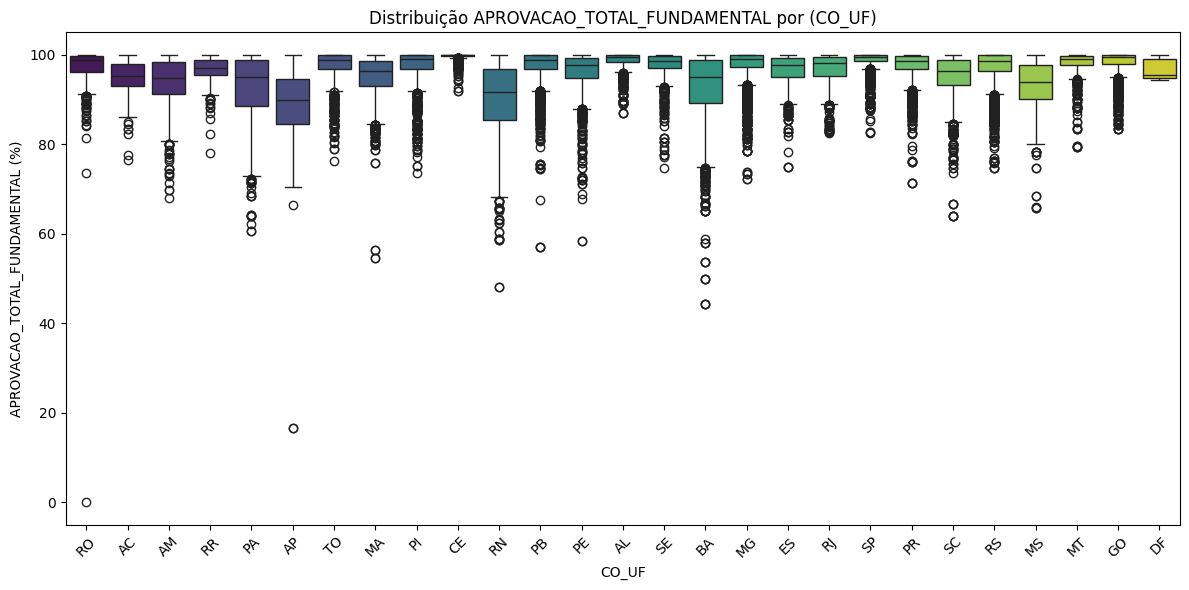

----------------------------------------
Coluna: APROVACAO_ANOS_INICIAIS
Número de exemplares: 55631
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 16.253664690249074
Desvio padrão: 4.031583397407162
Distribuição:
count    55631.000000
mean        97.737911
std          4.031583
min          0.000000
25%         97.200000
50%         99.500000
75%        100.000000
max        100.000000
Name: APROVACAO_ANOS_INICIAIS, dtype: float64
Quantidade de NAs: 9945
Existência de outliers: 1293



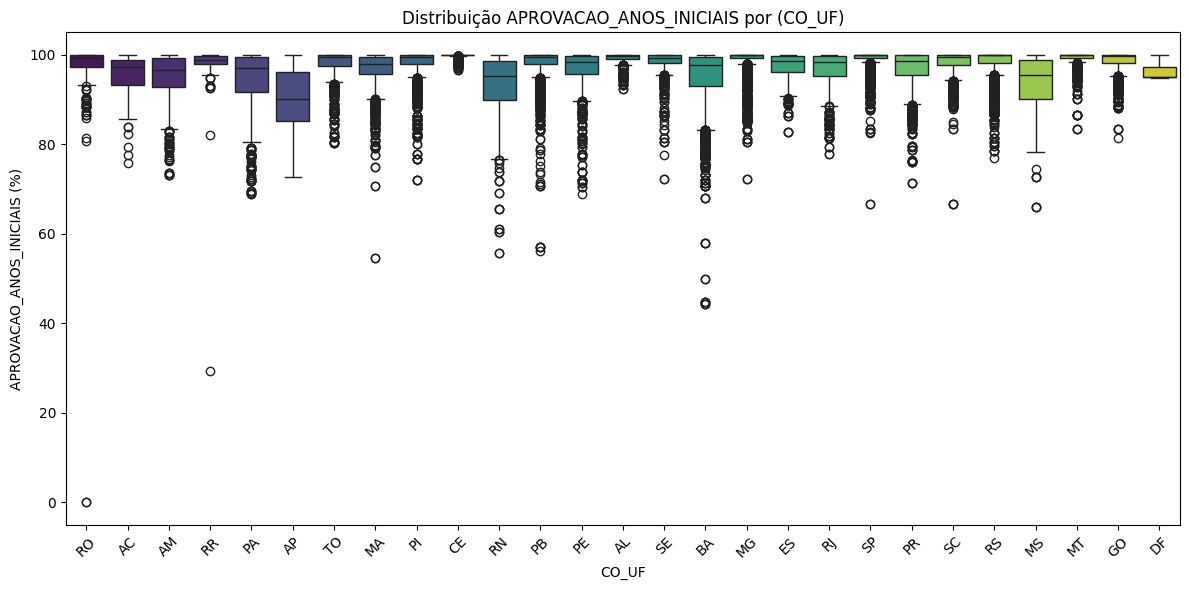

----------------------------------------
Coluna: APROVACAO_ANOS_FINAIS
Número de exemplares: 52637
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 38.84224603765159
Desvio padrão: 6.2323547746940395
Distribuição:
count    52637.000000
mean        95.530659
std          6.232355
min          0.000000
25%         93.800000
50%         98.000000
75%         99.700000
max        100.000000
Name: APROVACAO_ANOS_FINAIS, dtype: float64
Quantidade de NAs: 12939
Existência de outliers: 1151



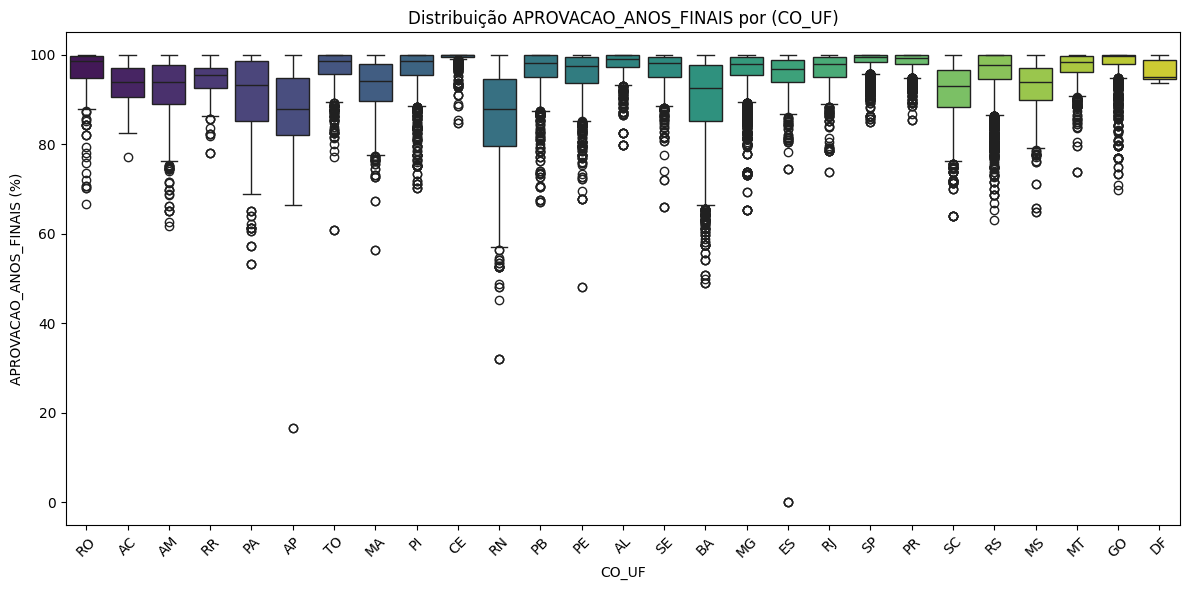

----------------------------------------
Coluna: APROVACAO_ANO_1
Número de exemplares: 54618
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 6.137553084321076
Desvio padrão: 2.477408542069934
Distribuição:
count    54618.000000
mean        99.222639
std          2.477409
min          0.000000
25%         99.500000
50%        100.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_1, dtype: float64
Quantidade de NAs: 10958
Existência de outliers: 956



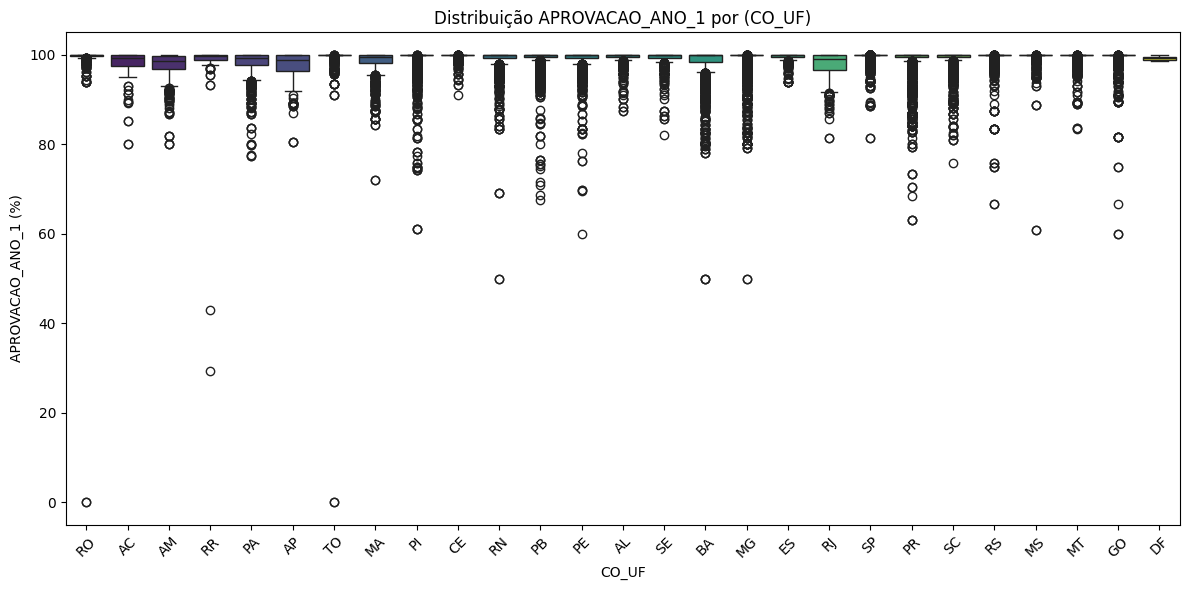

----------------------------------------
Coluna: APROVACAO_ANO_2
Número de exemplares: 54797
Valor máximo: 100.0
Valor mínimo: 30.3
Variância: 15.266873232307736
Desvio padrão: 3.9072846367148295
Distribuição:
count    54797.000000
mean        98.574787
std          3.907285
min         30.300000
25%         99.100000
50%        100.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_2, dtype: float64
Quantidade de NAs: 10779
Existência de outliers: 1446



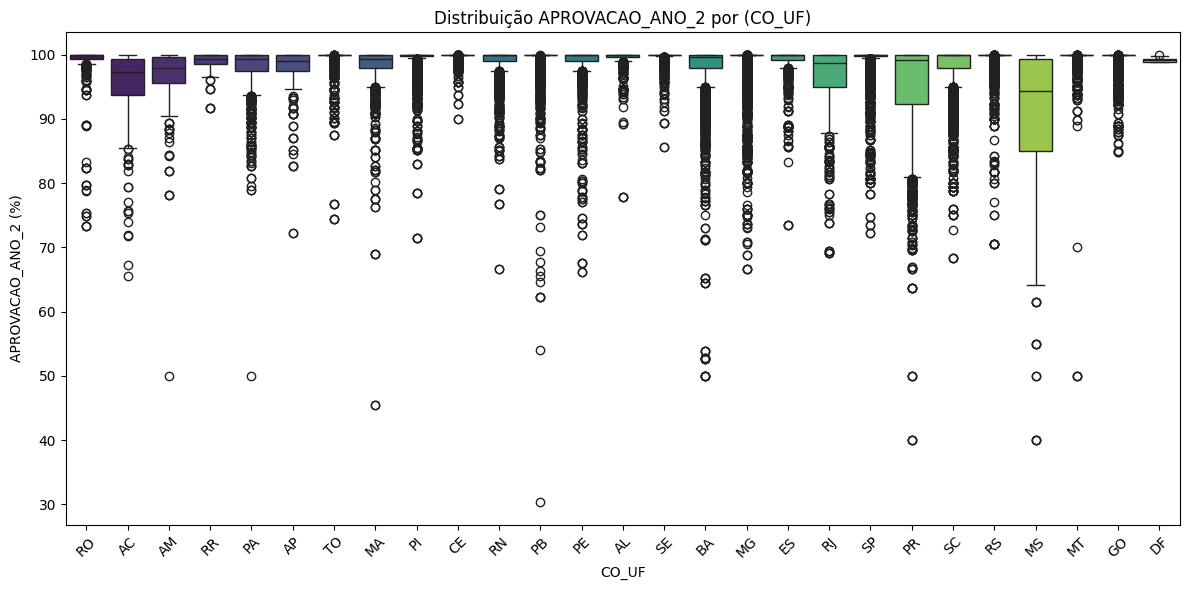

----------------------------------------
Coluna: APROVACAO_ANO_3
Número de exemplares: 54925
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 36.810364172335696
Desvio padrão: 6.067154536711233
Distribuição:
count    54925.000000
mean        97.057926
std          6.067155
min          0.000000
25%         96.900000
50%        100.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_3, dtype: float64
Quantidade de NAs: 10651
Existência de outliers: 1218



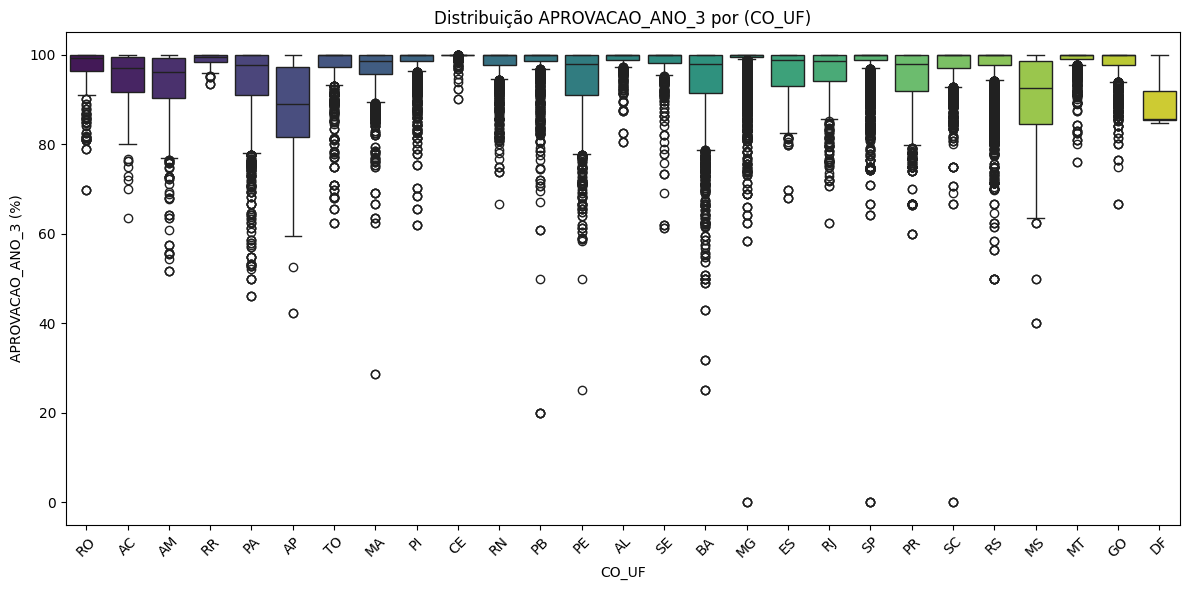

----------------------------------------
Coluna: APROVACAO_ANO_4
Número de exemplares: 55059
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 35.01058814056293
Desvio padrão: 5.9169745766365205
Distribuição:
count    55059.000000
mean        97.258357
std          5.916975
min          0.000000
25%         97.300000
50%        100.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_4, dtype: float64
Quantidade de NAs: 10517
Existência de outliers: 1377



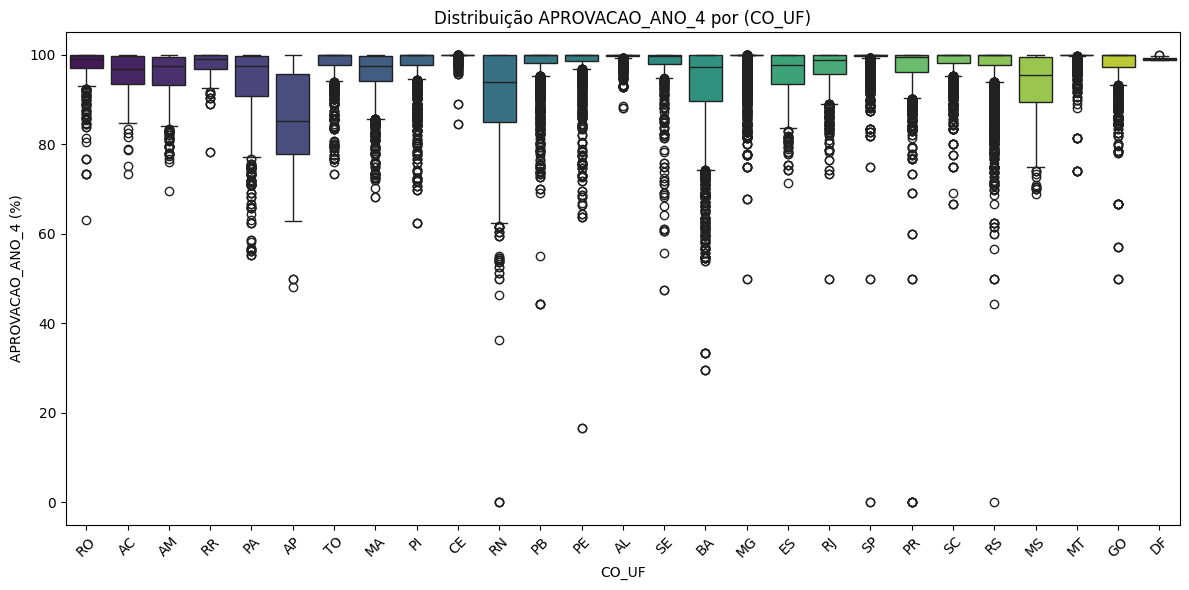

----------------------------------------
Coluna: APROVACAO_ANO_5
Número de exemplares: 54957
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 40.08092994555704
Desvio padrão: 6.330950161354695
Distribuição:
count    54957.000000
mean        97.051517
std          6.330950
min          0.000000
25%         97.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_5, dtype: float64
Quantidade de NAs: 10619
Existência de outliers: 1256



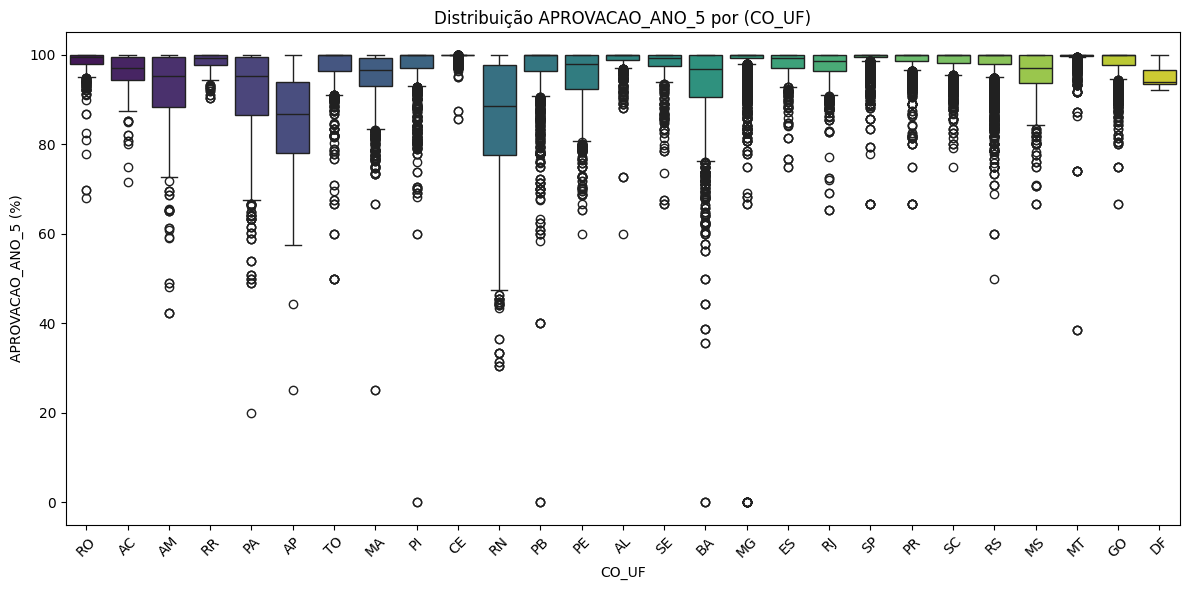

----------------------------------------
Coluna: APROVACAO_ANO_6
Número de exemplares: 52115
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 44.09209638256394
Desvio padrão: 6.640187977953933
Distribuição:
count    52115.000000
mean        96.103275
std          6.640188
min          0.000000
25%         95.000000
50%         99.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_6, dtype: float64
Quantidade de NAs: 13461
Existência de outliers: 1236



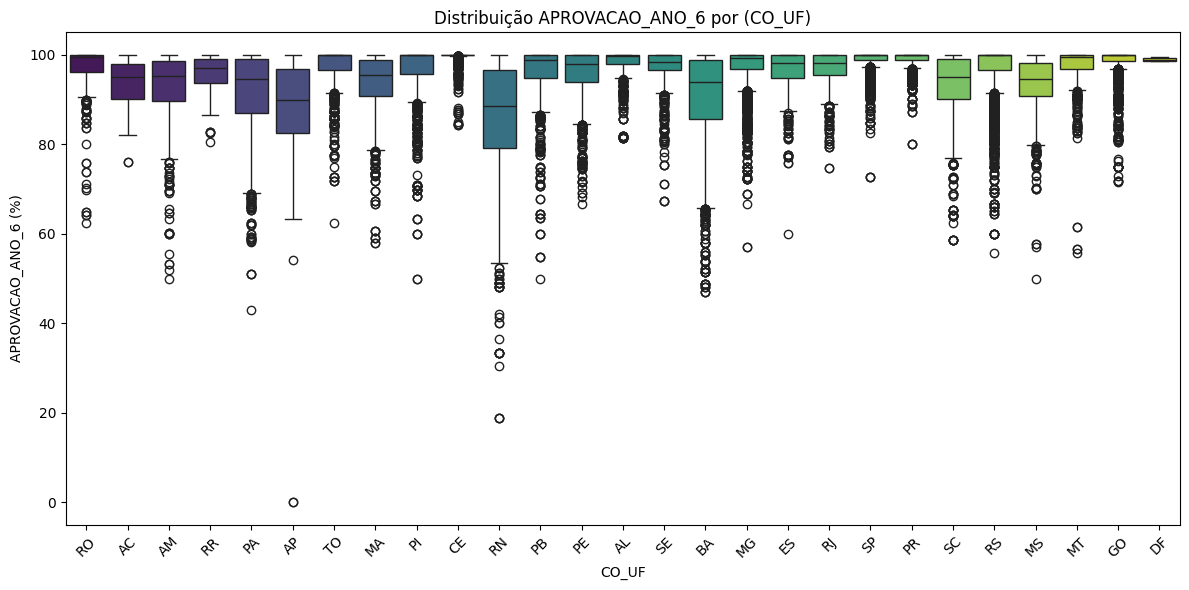

----------------------------------------
Coluna: APROVACAO_ANO_7
Número de exemplares: 52063
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 57.99492929686264
Desvio padrão: 7.615440190616865
Distribuição:
count    52063.000000
mean        95.045428
std          7.615440
min          0.000000
25%         93.200000
50%         98.100000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_7, dtype: float64
Quantidade de NAs: 13513
Existência de outliers: 1102



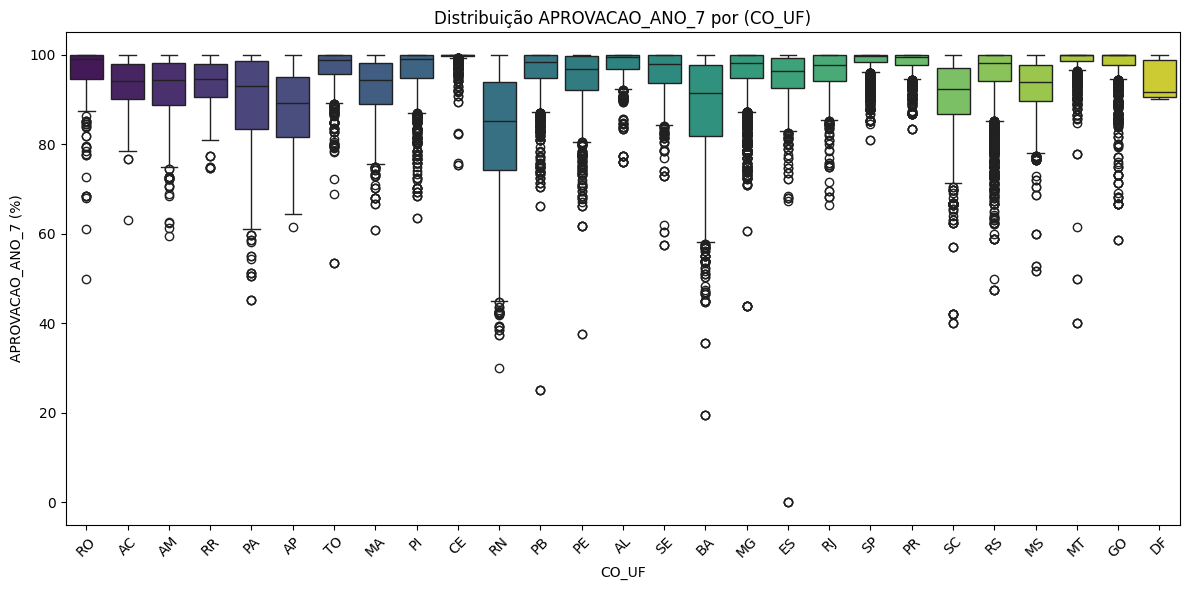

----------------------------------------
Coluna: APROVACAO_ANO_8
Número de exemplares: 51984
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 45.34866112042783
Desvio padrão: 6.7341414538475375
Distribuição:
count    51984.000000
mean        95.289329
std          6.734141
min          0.000000
25%         93.300000
50%         98.000000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_8, dtype: float64
Quantidade de NAs: 13592
Existência de outliers: 1043



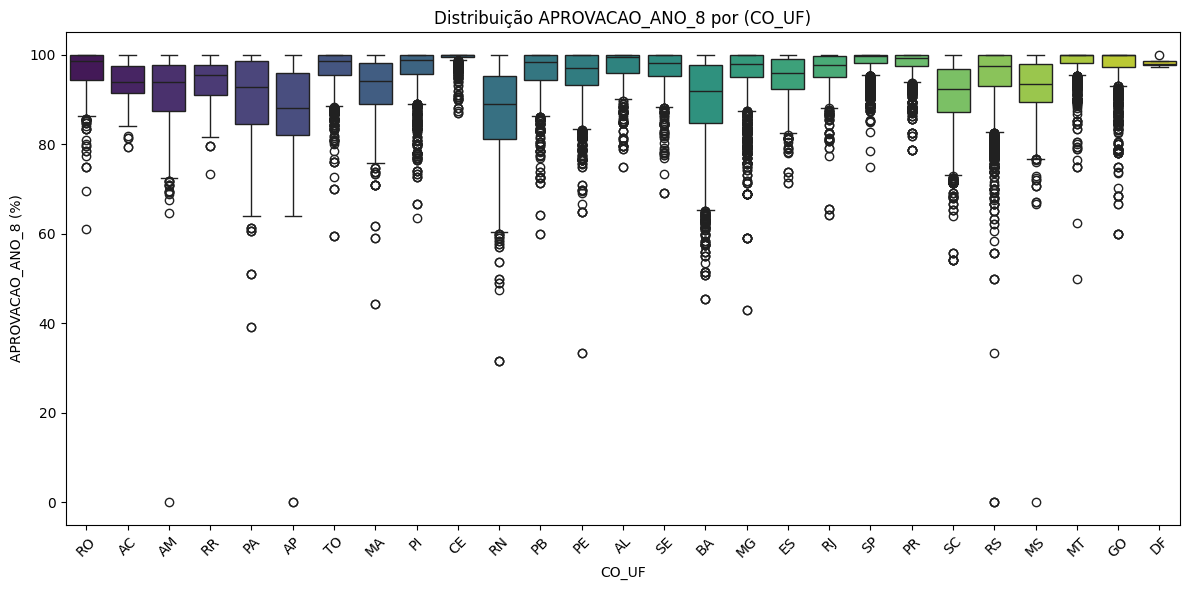

----------------------------------------
Coluna: APROVACAO_ANO_9
Número de exemplares: 51920
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 34.7107241877059
Desvio padrão: 5.891580788524069
Distribuição:
count    51920.000000
mean        95.924663
std          5.891581
min          0.000000
25%         94.100000
50%         98.100000
75%        100.000000
max        100.000000
Name: APROVACAO_ANO_9, dtype: float64
Quantidade de NAs: 13656
Existência de outliers: 955



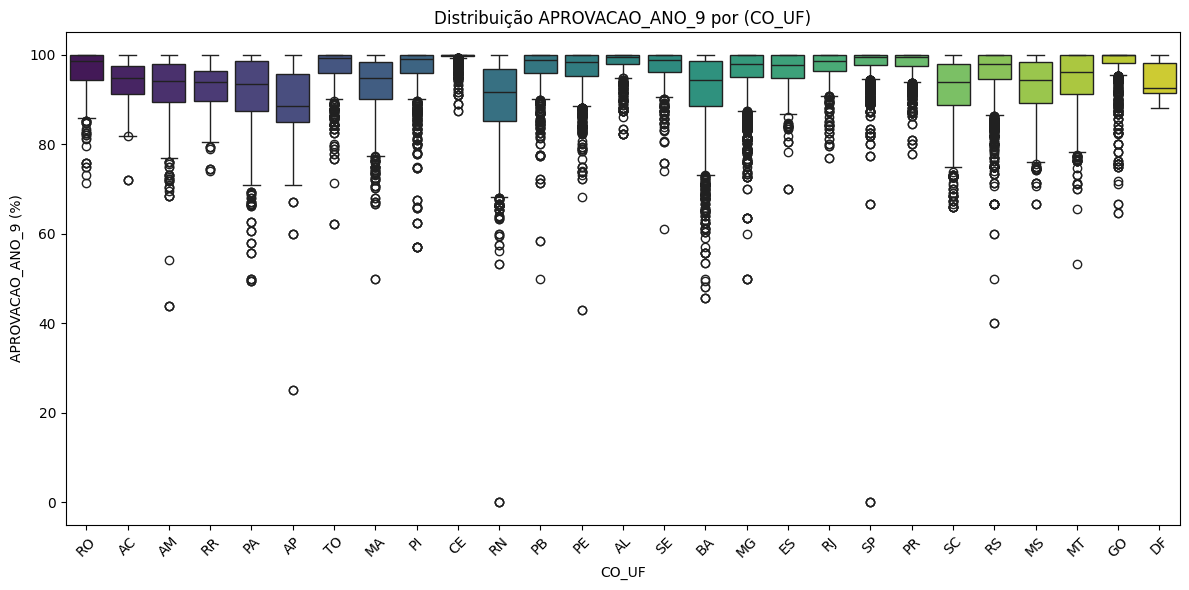

----------------------------------------
Coluna: APROVACAO_TOTAL_MEDIO
Número de exemplares: 42048
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 91.82860629026985
Desvio padrão: 9.58272436681082
Distribuição:
count    42048.000000
mean        91.354393
std          9.582724
min          0.000000
25%         87.400000
50%         94.500000
75%         98.500000
max        100.000000
Name: APROVACAO_TOTAL_MEDIO, dtype: float64
Quantidade de NAs: 23528
Existência de outliers: 714



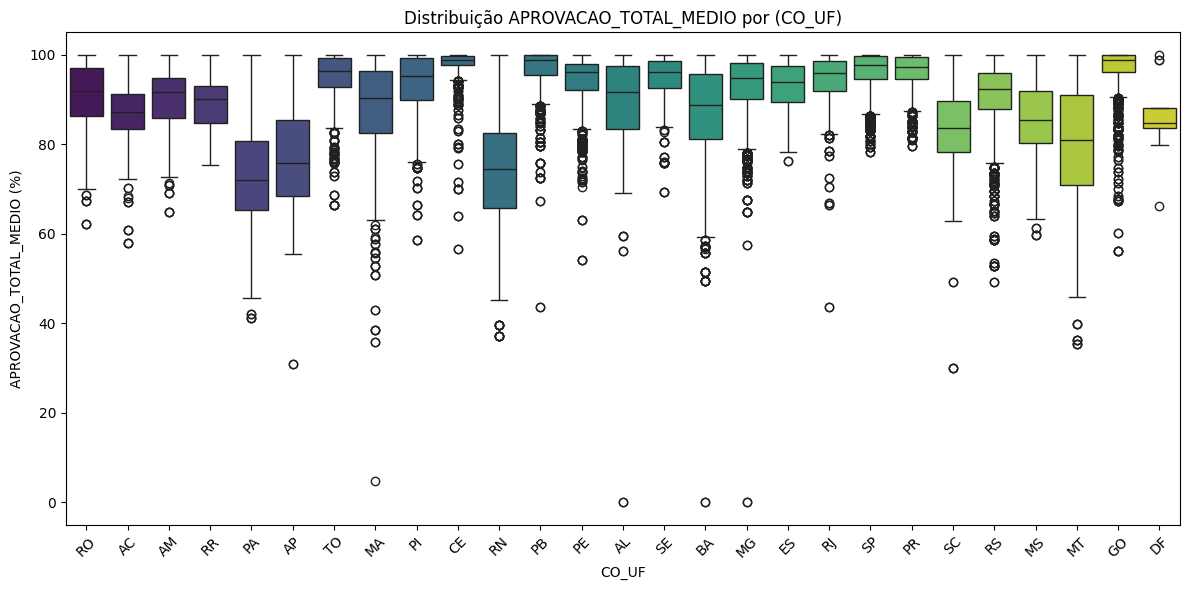

----------------------------------------
Coluna: APROVACAO_MEDIO_1
Número de exemplares: 41749
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 100.77668010249171
Desvio padrão: 10.03875889253705
Distribuição:
count    41749.000000
mean        91.480253
std         10.038759
min          0.000000
25%         87.400000
50%         94.900000
75%         99.100000
max        100.000000
Name: APROVACAO_MEDIO_1, dtype: float64
Quantidade de NAs: 23827
Existência de outliers: 689



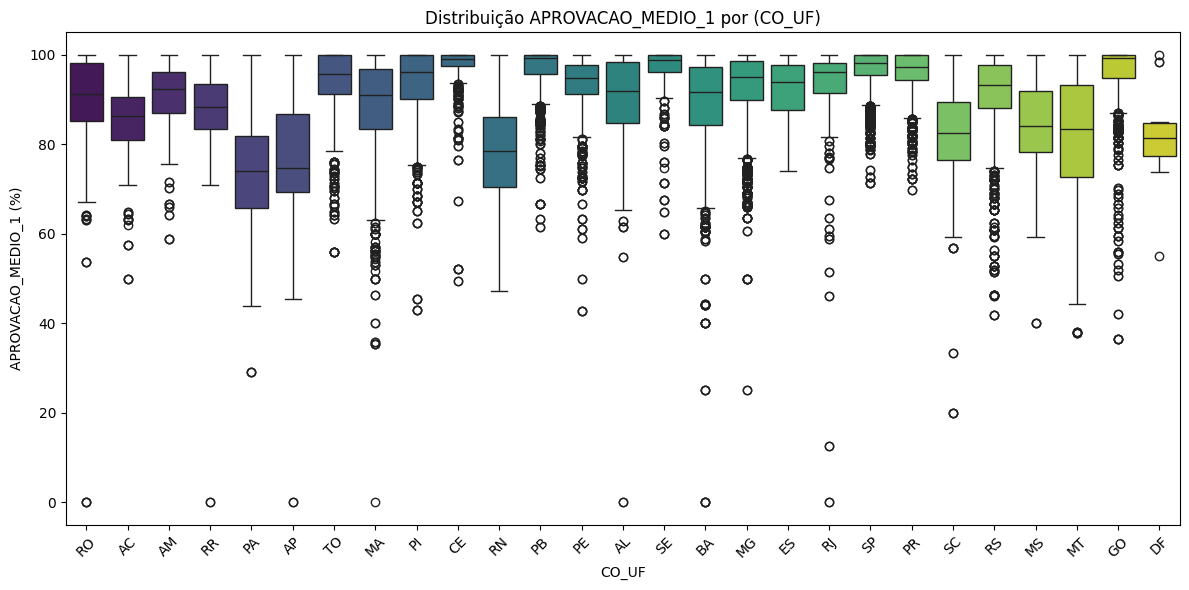

----------------------------------------
Coluna: APROVACAO_MEDIO_2
Número de exemplares: 41608
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 125.00063248738122
Desvio padrão: 11.180368173158755
Distribuição:
count    41608.000000
mean        90.141879
std         11.180368
min          0.000000
25%         85.500000
50%         93.800000
75%         98.800000
max        100.000000
Name: APROVACAO_MEDIO_2, dtype: float64
Quantidade de NAs: 23968
Existência de outliers: 711



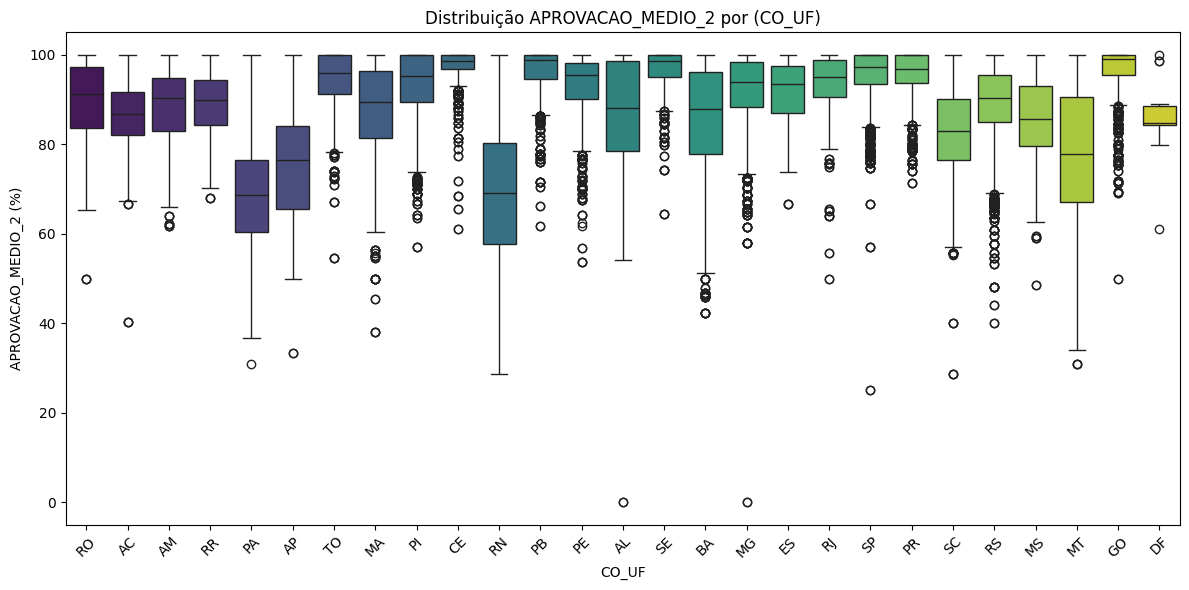

----------------------------------------
Coluna: APROVACAO_MEDIO_3
Número de exemplares: 41502
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 90.70386246331576
Desvio padrão: 9.523857541107793
Distribuição:
count    41502.000000
mean        92.813366
std          9.523858
min          0.000000
25%         89.600000
50%         96.300000
75%        100.000000
max        100.000000
Name: APROVACAO_MEDIO_3, dtype: float64
Quantidade de NAs: 24074
Existência de outliers: 822



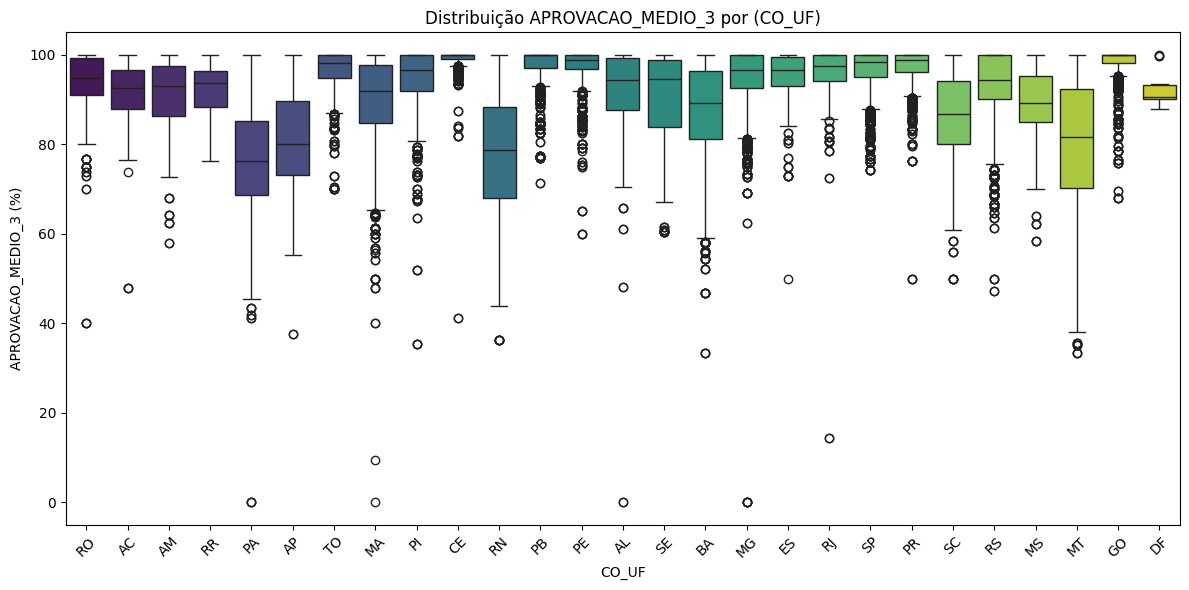

----------------------------------------
Coluna: REPROVACAO_TOTAL_FUNDAMENTAL
Número de exemplares: 60621
Valor máximo: 55.6
Valor mínimo: 0.0
Variância: 12.401817908228413
Desvio padrão: 3.521621488494812
Distribuição:
count    60621.000000
mean         2.058175
std          3.521621
min          0.000000
25%          0.000000
50%          0.500000
75%          2.600000
max         55.600000
Name: REPROVACAO_TOTAL_FUNDAMENTAL, dtype: float64
Quantidade de NAs: 4955
Existência de outliers: 1367



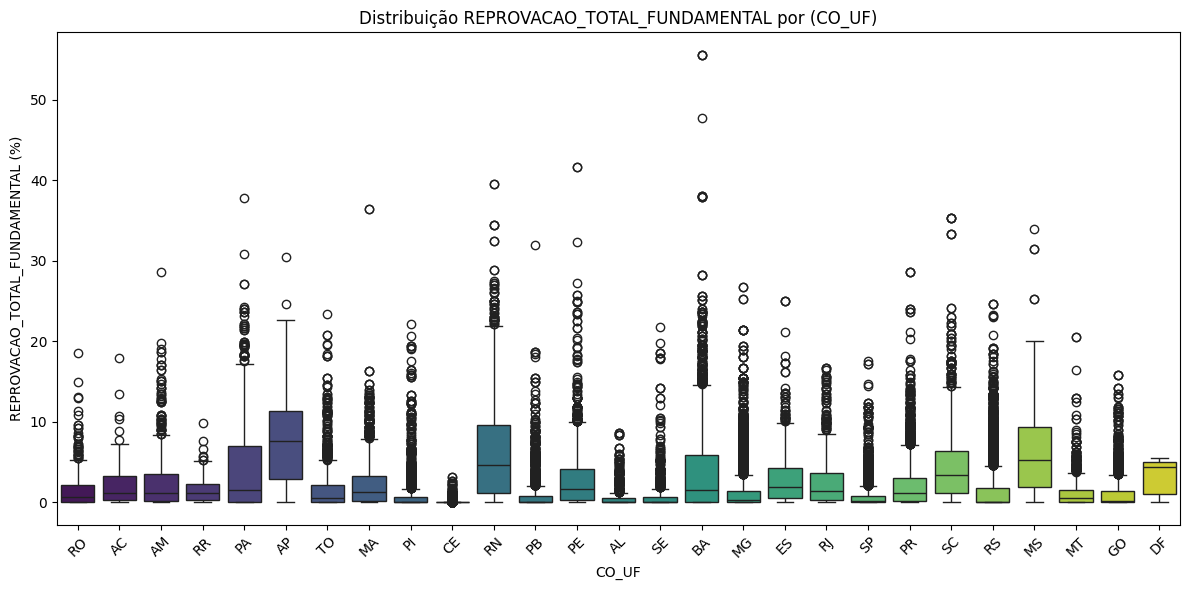

----------------------------------------
Coluna: REPROVACAO_ANOS_INICIAIS
Número de exemplares: 55631
Valor máximo: 55.6
Valor mínimo: 0.0
Variância: 11.152763167276575
Desvio padrão: 3.3395752974407653
Distribuição:
count    55631.000000
mean         1.690043
std          3.339575
min          0.000000
25%          0.000000
50%          0.100000
75%          1.800000
max         55.600000
Name: REPROVACAO_ANOS_INICIAIS, dtype: float64
Quantidade de NAs: 9945
Existência de outliers: 1322



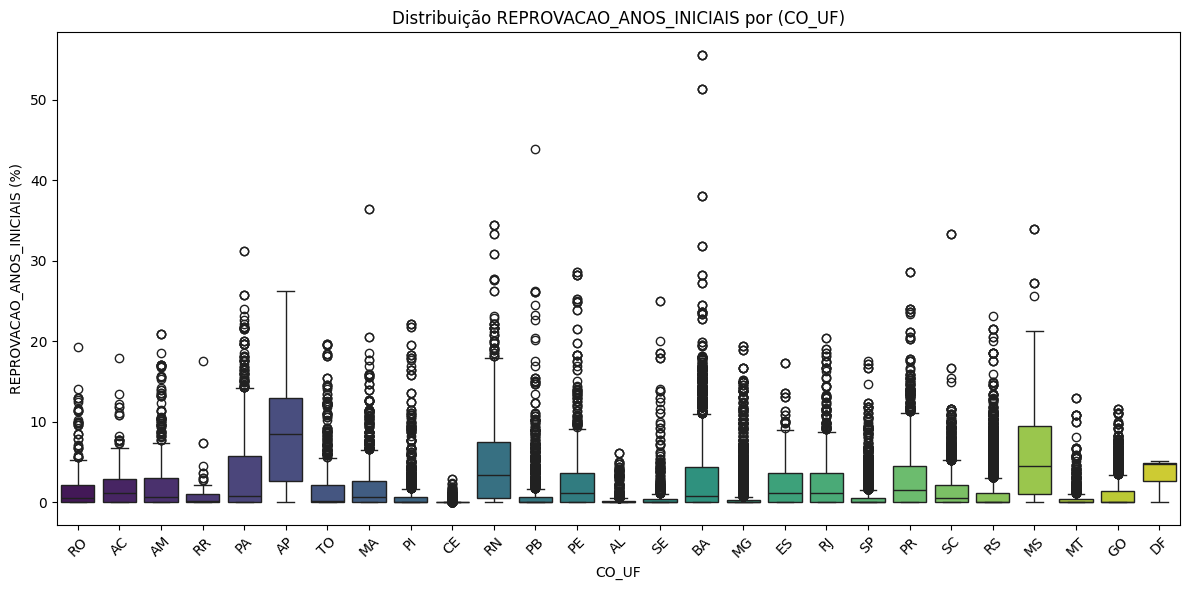

----------------------------------------
Coluna: REPROVACAO_ANOS_FINAIS
Número de exemplares: 52637
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 20.414366478574006
Desvio padrão: 4.518226032258015
Distribuição:
count    52637.000000
mean         2.534578
std          4.518226
min          0.000000
25%          0.000000
50%          0.500000
75%          3.100000
max        100.000000
Name: REPROVACAO_ANOS_FINAIS, dtype: float64
Quantidade de NAs: 12939
Existência de outliers: 1185



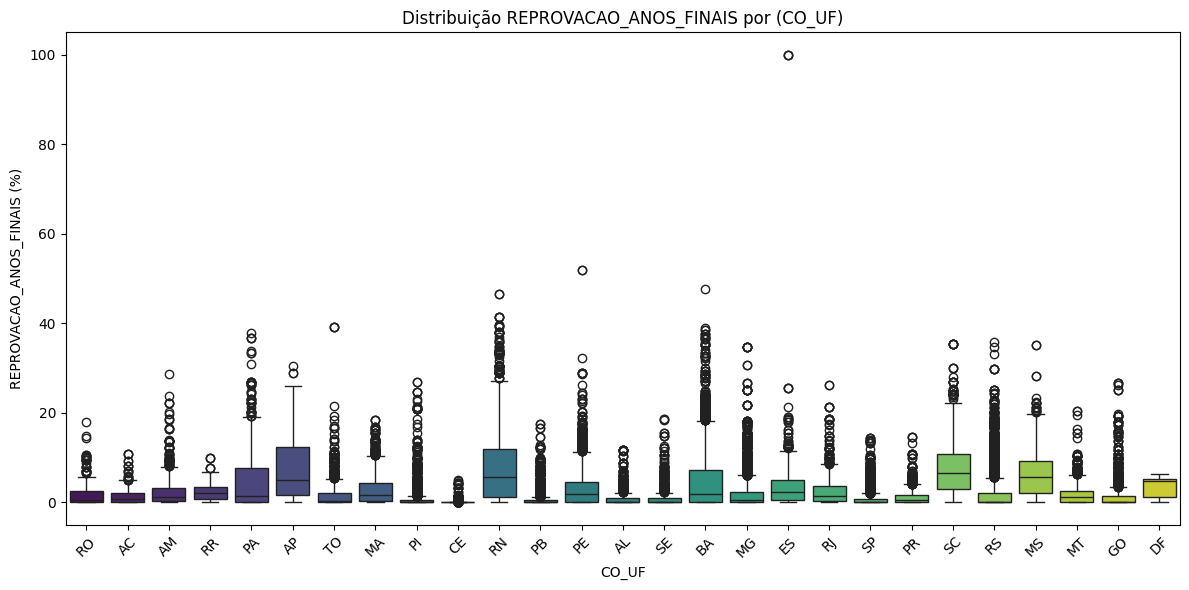

----------------------------------------
Coluna: REPROVACAO_ANO_1
Número de exemplares: 54618
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 3.1695934347906602
Desvio padrão: 1.7803352029296786
Distribuição:
count    54618.000000
mean         0.345763
std          1.780335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: REPROVACAO_ANO_1, dtype: float64
Quantidade de NAs: 10958
Existência de outliers: 842



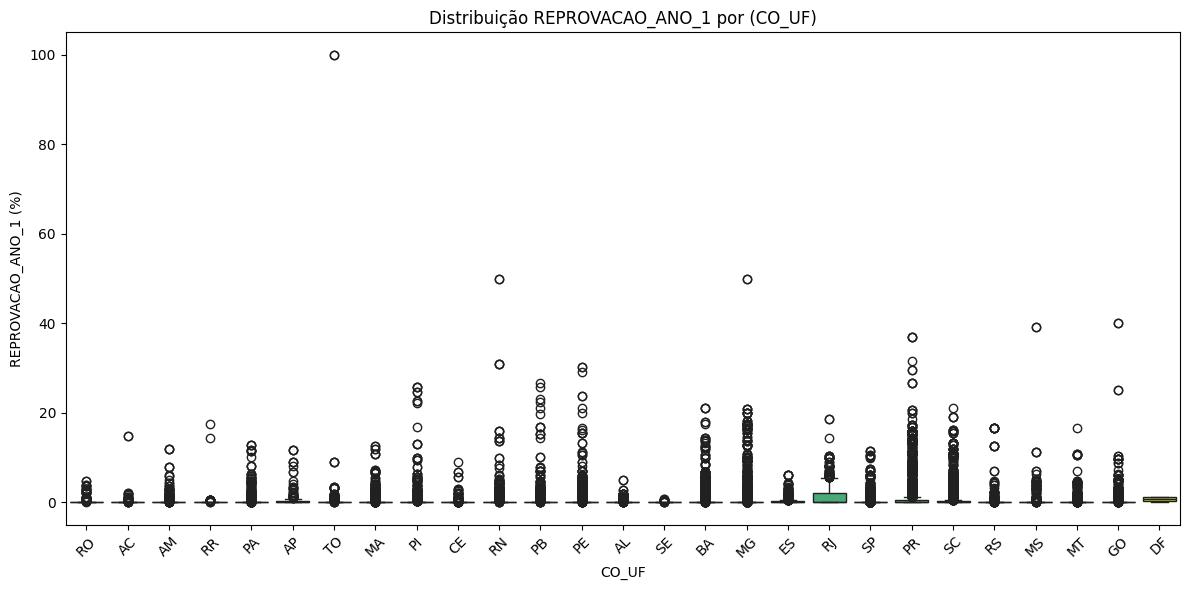

----------------------------------------
Coluna: REPROVACAO_ANO_2
Número de exemplares: 54797
Valor máximo: 69.7
Valor mínimo: 0.0
Variância: 12.892348291350226
Desvio padrão: 3.590591635281047
Distribuição:
count    54797.000000
mean         0.997894
std          3.590592
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         69.700000
Name: REPROVACAO_ANO_2, dtype: float64
Quantidade de NAs: 10779
Existência de outliers: 1448



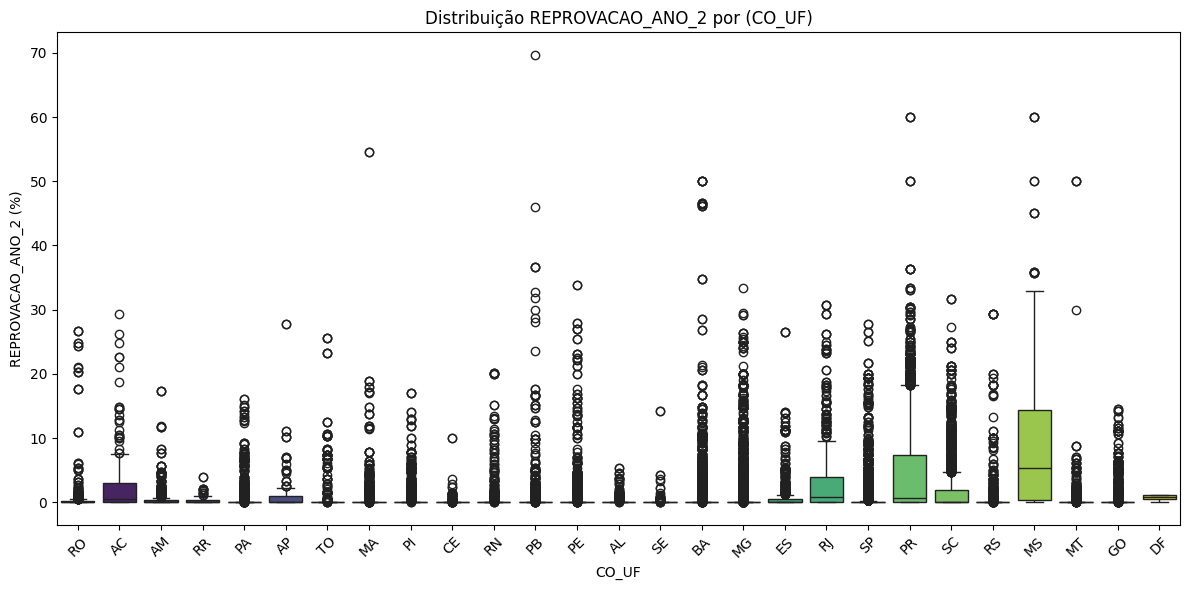

----------------------------------------
Coluna: REPROVACAO_ANO_3
Número de exemplares: 54925
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 31.10075708426759
Desvio padrão: 5.576805275806892
Distribuição:
count    54925.000000
mean         2.414008
std          5.576805
min          0.000000
25%          0.000000
50%          0.000000
75%          1.900000
max        100.000000
Name: REPROVACAO_ANO_3, dtype: float64
Quantidade de NAs: 10651
Existência de outliers: 1267



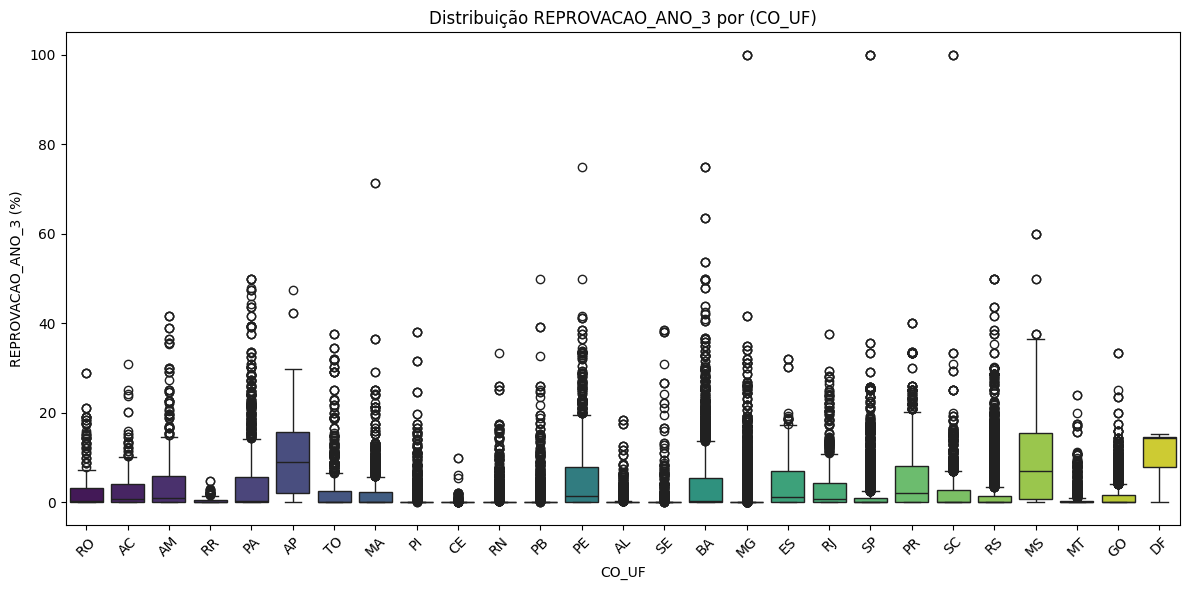

----------------------------------------
Coluna: REPROVACAO_ANO_4
Número de exemplares: 55059
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 26.770573190036586
Desvio padrão: 5.174028719483164
Distribuição:
count    55059.000000
mean         2.097661
std          5.174029
min          0.000000
25%          0.000000
50%          0.000000
75%          1.400000
max        100.000000
Name: REPROVACAO_ANO_4, dtype: float64
Quantidade de NAs: 10517
Existência de outliers: 1343



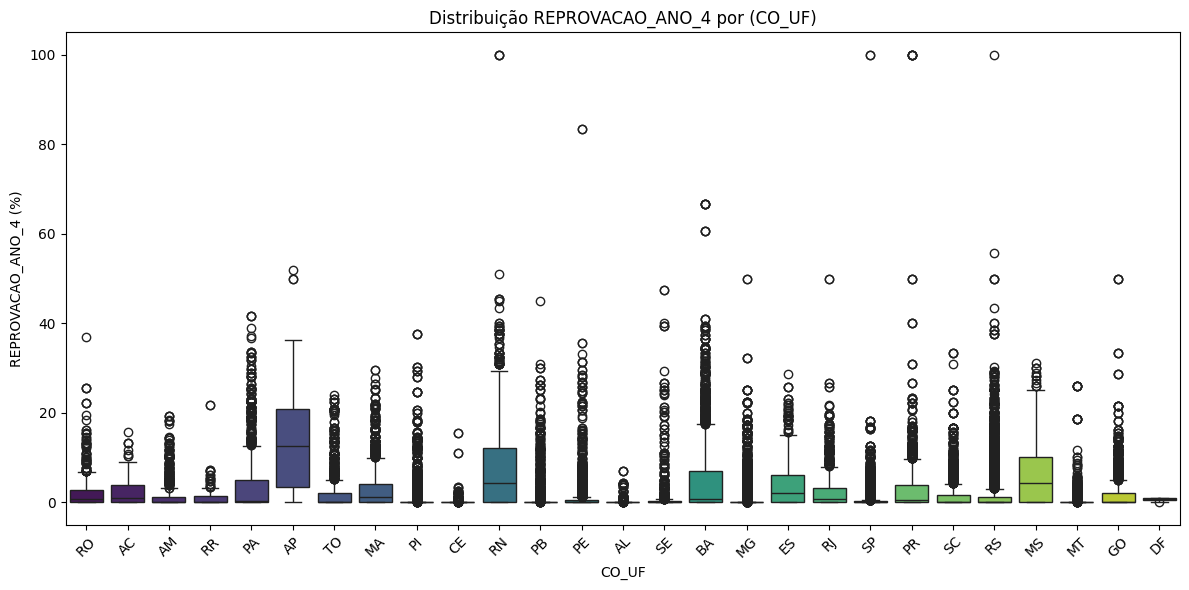

----------------------------------------
Coluna: REPROVACAO_ANO_5
Número de exemplares: 54957
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 29.43968961409941
Desvio padrão: 5.425835383984609
Distribuição:
count    54957.000000
mean         2.222168
std          5.425835
min          0.000000
25%          0.000000
50%          0.000000
75%          1.900000
max        100.000000
Name: REPROVACAO_ANO_5, dtype: float64
Quantidade de NAs: 10619
Existência de outliers: 1269



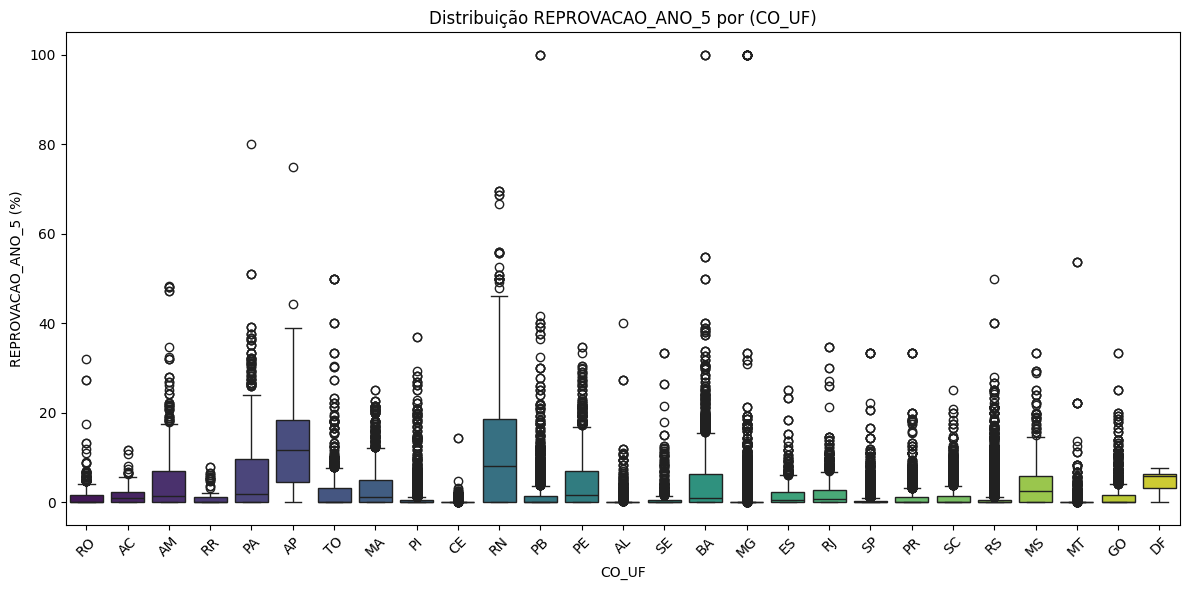

----------------------------------------
Coluna: REPROVACAO_ANO_6
Número de exemplares: 52115
Valor máximo: 60.0
Valor mínimo: 0.0
Variância: 25.351794411237513
Desvio padrão: 5.035056544989094
Distribuição:
count    52115.000000
mean         2.454366
std          5.035057
min          0.000000
25%          0.000000
50%          0.000000
75%          2.600000
max         60.000000
Name: REPROVACAO_ANO_6, dtype: float64
Quantidade de NAs: 13461
Existência de outliers: 1308



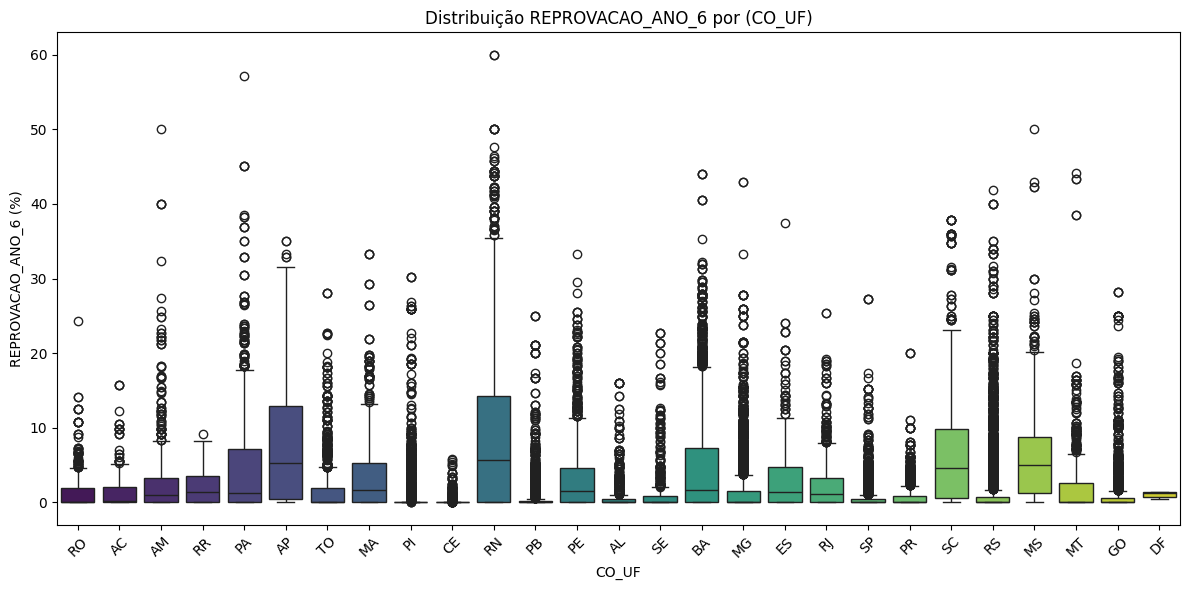

----------------------------------------
Coluna: REPROVACAO_ANO_7
Número de exemplares: 52063
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 32.96764335893194
Desvio padrão: 5.74174567173886
Distribuição:
count    52063.000000
mean         2.928481
std          5.741746
min          0.000000
25%          0.000000
50%          0.000000
75%          3.500000
max        100.000000
Name: REPROVACAO_ANO_7, dtype: float64
Quantidade de NAs: 13513
Existência de outliers: 1166



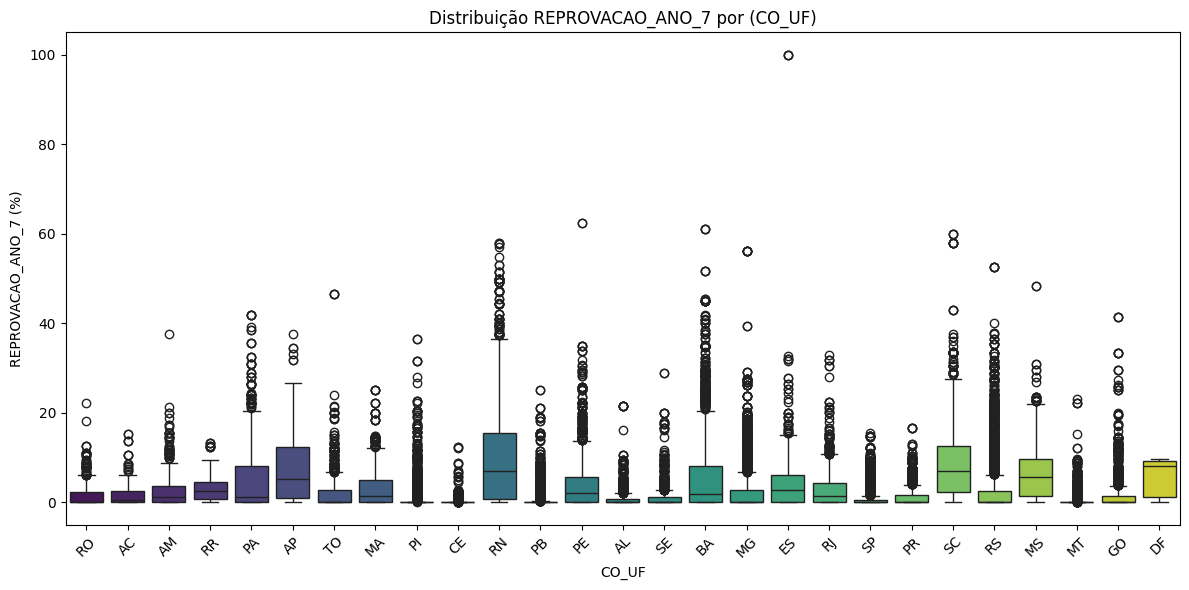

----------------------------------------
Coluna: REPROVACAO_ANO_8
Número de exemplares: 51984
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 23.36476694072621
Desvio padrão: 4.833711507809109
Distribuição:
count    51984.000000
mean         2.562452
std          4.833712
min          0.000000
25%          0.000000
50%          0.000000
75%          3.200000
max        100.000000
Name: REPROVACAO_ANO_8, dtype: float64
Quantidade de NAs: 13592
Existência de outliers: 1182



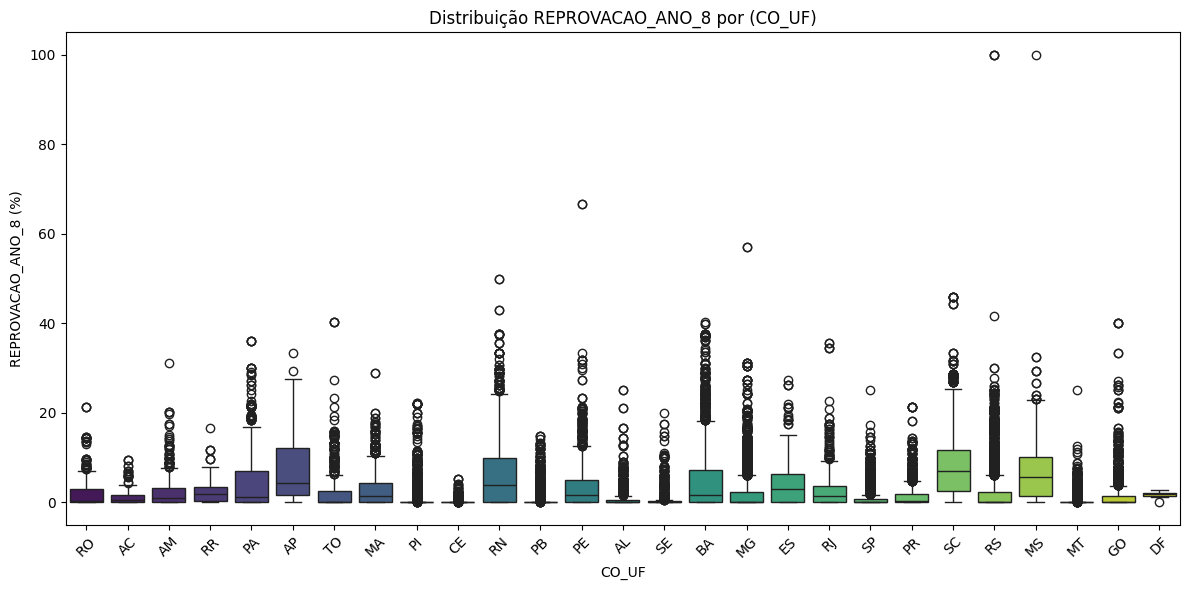

----------------------------------------
Coluna: REPROVACAO_ANO_9
Número de exemplares: 51920
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 16.203099554224426
Desvio padrão: 4.025307386302868
Distribuição:
count    51920.000000
mean         2.004056
std          4.025307
min          0.000000
25%          0.000000
50%          0.000000
75%          2.300000
max        100.000000
Name: REPROVACAO_ANO_9, dtype: float64
Quantidade de NAs: 13656
Existência de outliers: 1274



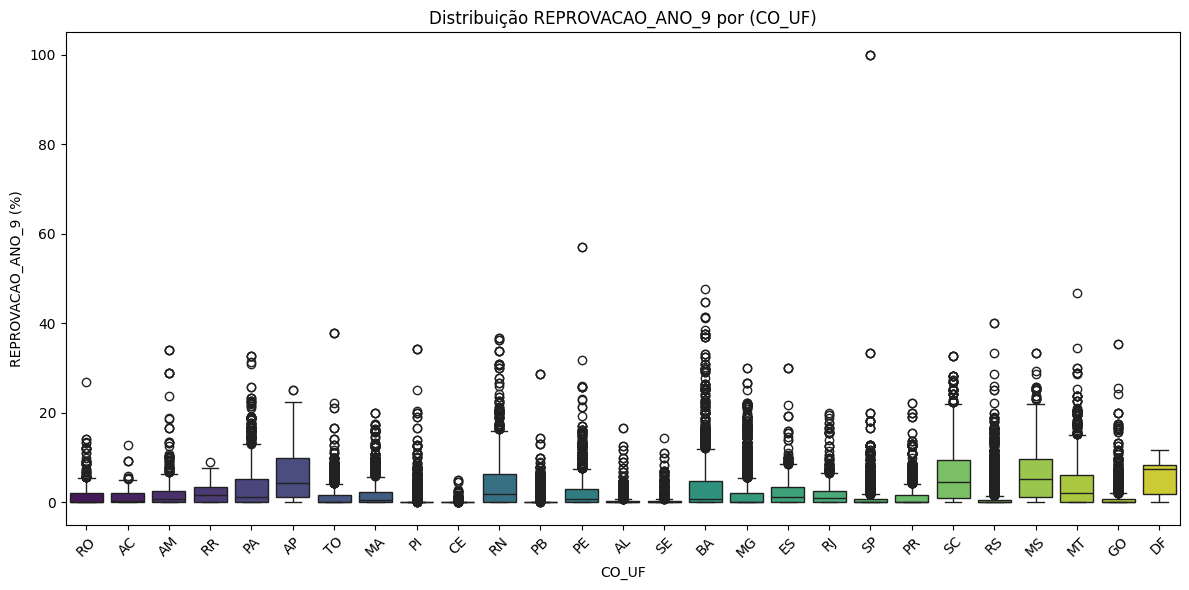

----------------------------------------
Coluna: REPROVACAO_TOTAL_MEDIO
Número de exemplares: 42048
Valor máximo: 64.5
Valor mínimo: 0.0
Variância: 35.94992731434227
Desvio padrão: 5.995825824216566
Distribuição:
count    42048.000000
mean         3.523012
std          5.995826
min          0.000000
25%          0.000000
50%          0.900000
75%          4.400000
max         64.500000
Name: REPROVACAO_TOTAL_MEDIO, dtype: float64
Quantidade de NAs: 23528
Existência de outliers: 947



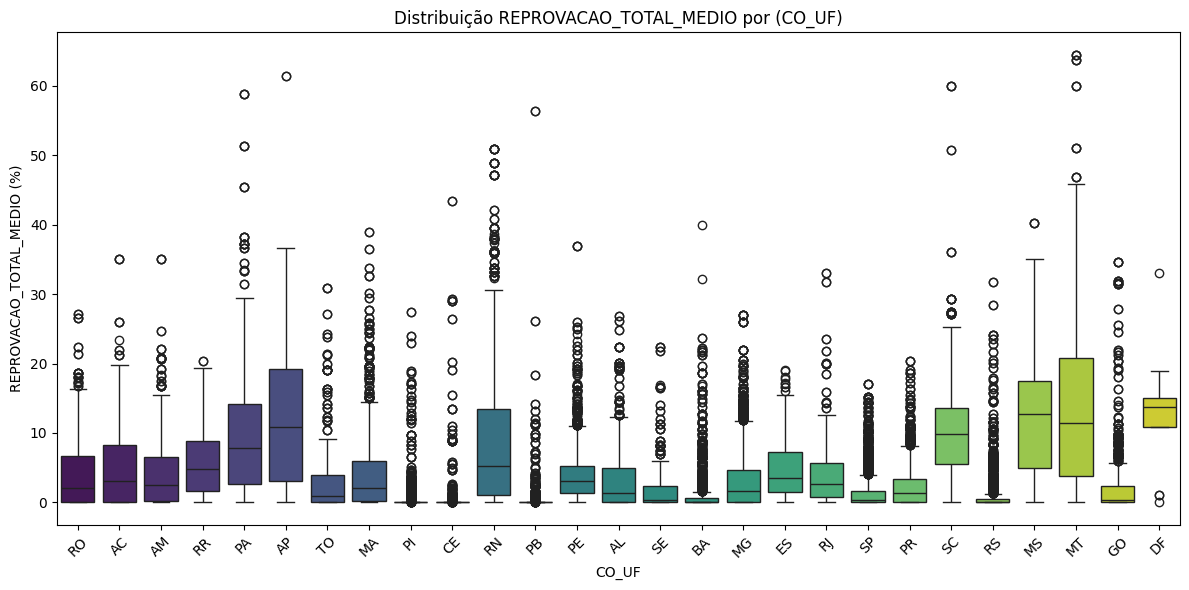

----------------------------------------
Coluna: REPROVACAO_MEDIO_1
Número de exemplares: 41749
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 47.856015667154956
Desvio padrão: 6.9178042518674205
Distribuição:
count    41749.000000
mean         3.943026
std          6.917804
min          0.000000
25%          0.000000
50%          0.600000
75%          4.900000
max        100.000000
Name: REPROVACAO_MEDIO_1, dtype: float64
Quantidade de NAs: 23827
Existência de outliers: 955



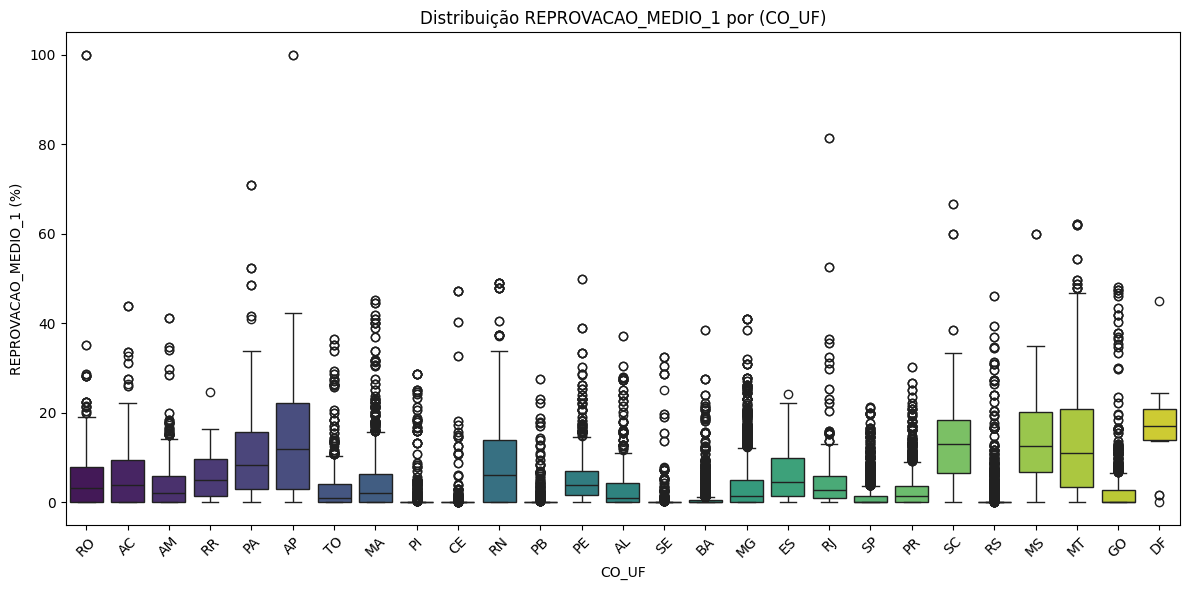

----------------------------------------
Coluna: REPROVACAO_MEDIO_2
Número de exemplares: 41608
Valor máximo: 69.1
Valor mínimo: 0.0
Variância: 46.79025602148337
Desvio padrão: 6.840340343980215
Distribuição:
count    41608.000000
mean         3.862894
std          6.840340
min          0.000000
25%          0.000000
50%          0.500000
75%          5.000000
max         69.100000
Name: REPROVACAO_MEDIO_2, dtype: float64
Quantidade de NAs: 23968
Existência de outliers: 950



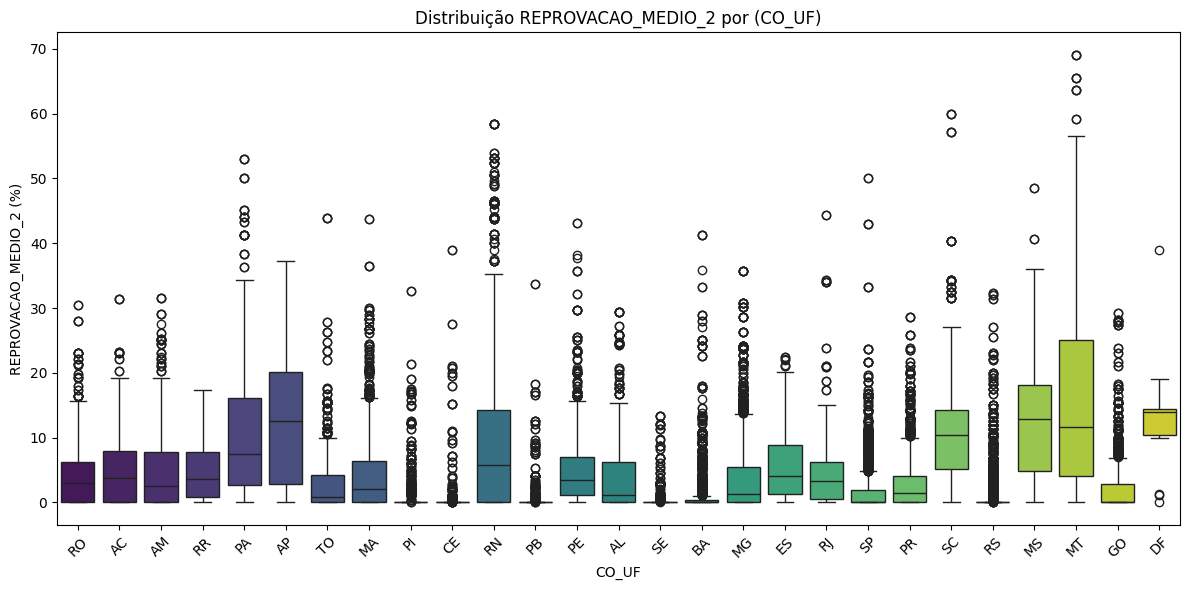

----------------------------------------
Coluna: REPROVACAO_MEDIO_3
Número de exemplares: 41502
Valor máximo: 66.7
Valor mínimo: 0.0
Variância: 29.91276714801831
Desvio padrão: 5.469256544359417
Distribuição:
count    41502.000000
mean         2.518103
std          5.469257
min          0.000000
25%          0.000000
50%          0.000000
75%          2.600000
max         66.700000
Name: REPROVACAO_MEDIO_3, dtype: float64
Quantidade de NAs: 24074
Existência de outliers: 925



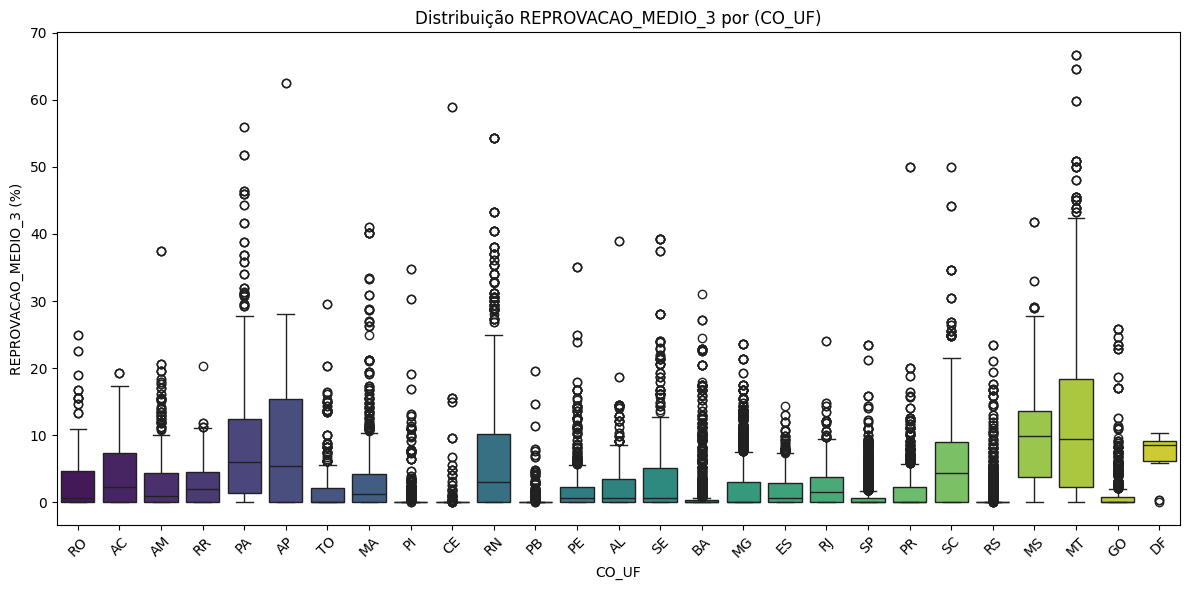

----------------------------------------
Coluna: ABANDONO_TOTAL_FUNDAMENTAL
Número de exemplares: 60621
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 5.3408230279545235
Desvio padrão: 2.3110220743113907
Distribuição:
count    60621.000000
mean         1.150095
std          2.311022
min          0.000000
25%          0.000000
50%          0.200000
75%          1.200000
max        100.000000
Name: ABANDONO_TOTAL_FUNDAMENTAL, dtype: float64
Quantidade de NAs: 4955
Existência de outliers: 1289



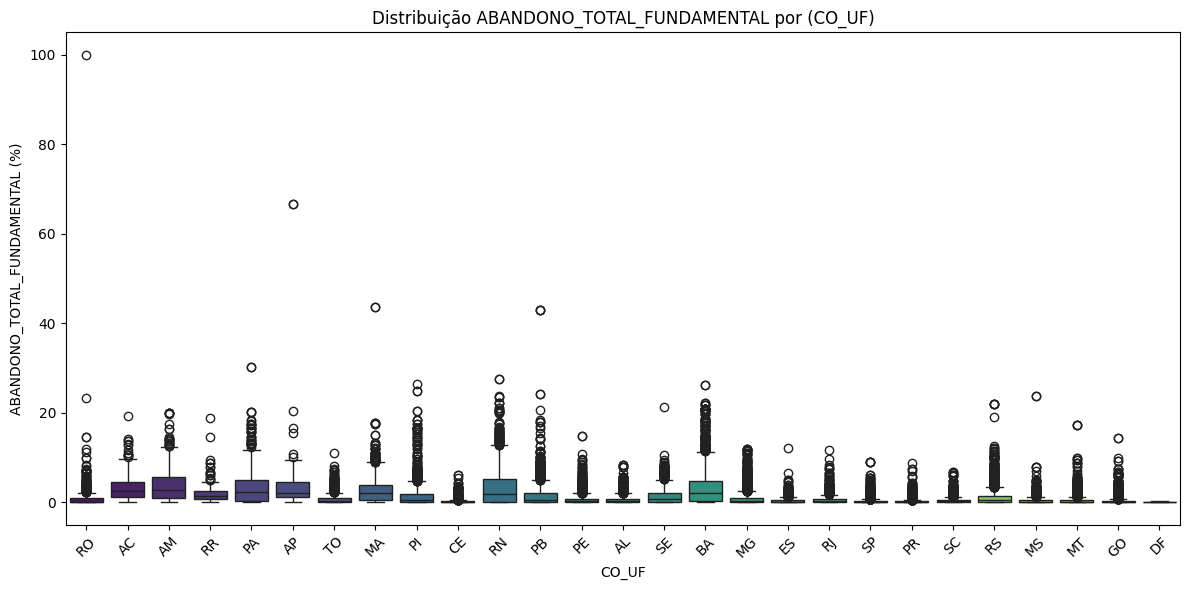

----------------------------------------
Coluna: ABANDONO_ANOS_INICIAIS
Número de exemplares: 55631
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 2.6813086281764833
Desvio padrão: 1.6374701915383019
Distribuição:
count    55631.000000
mean         0.572046
std          1.637470
min          0.000000
25%          0.000000
50%          0.000000
75%          0.400000
max        100.000000
Name: ABANDONO_ANOS_INICIAIS, dtype: float64
Quantidade de NAs: 9945
Existência de outliers: 988



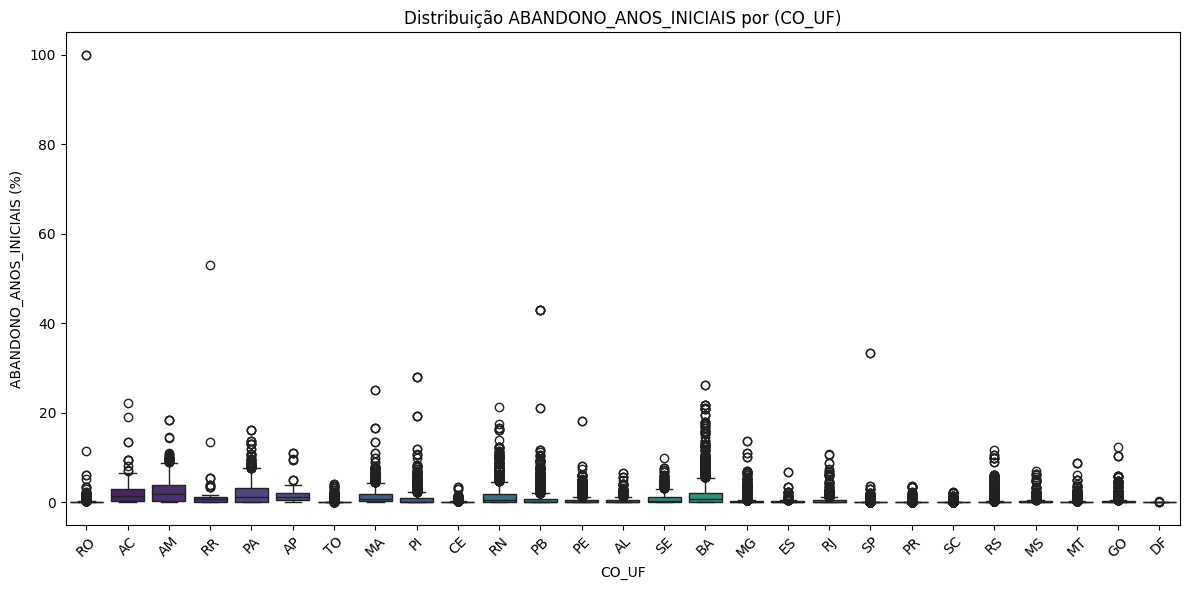

----------------------------------------
Coluna: ABANDONO_ANOS_FINAIS
Número de exemplares: 52637
Valor máximo: 66.6
Valor mínimo: 0.0
Variância: 11.968627391118815
Desvio padrão: 3.45957040557333
Distribuição:
count    52637.000000
mean         1.934763
std          3.459570
min          0.000000
25%          0.000000
50%          0.500000
75%          2.300000
max         66.600000
Name: ABANDONO_ANOS_FINAIS, dtype: float64
Quantidade de NAs: 12939
Existência de outliers: 1222



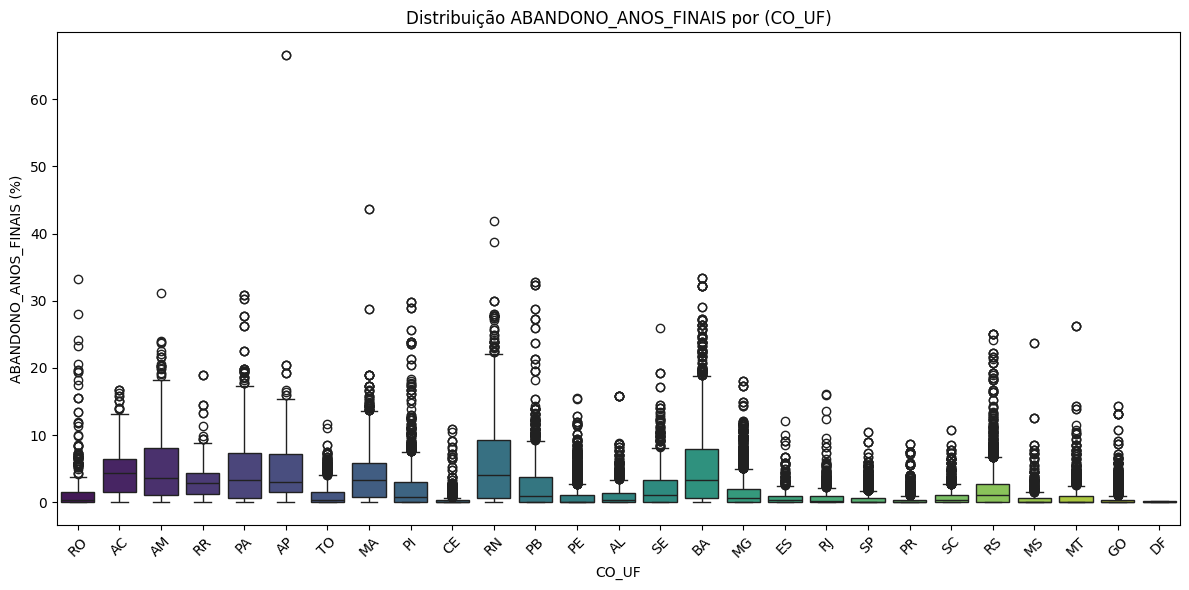

----------------------------------------
Coluna: ABANDONO_ANO_1
Número de exemplares: 54618
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 2.5976499769261636
Desvio padrão: 1.6117226737023227
Distribuição:
count    54618.000000
mean         0.431598
std          1.611723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: ABANDONO_ANO_1, dtype: float64
Quantidade de NAs: 10958
Existência de outliers: 858



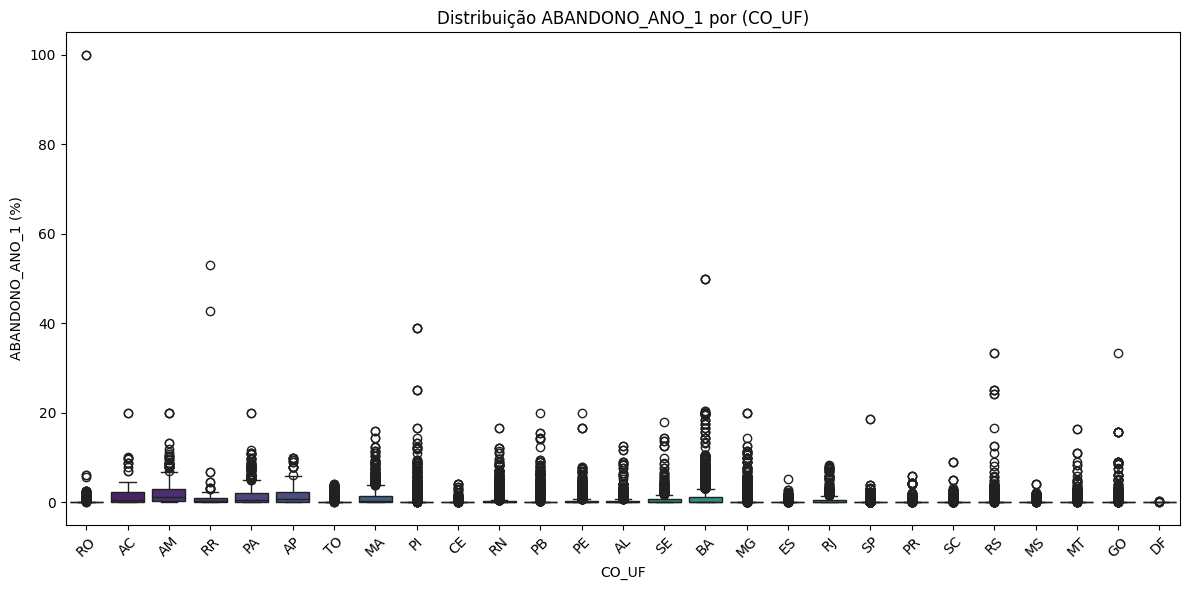

----------------------------------------
Coluna: ABANDONO_ANO_2
Número de exemplares: 54797
Valor máximo: 50.0
Valor mínimo: 0.0
Variância: 2.1131860616891656
Desvio padrão: 1.4536801786119138
Distribuição:
count    54797.000000
mean         0.427319
std          1.453680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: ABANDONO_ANO_2, dtype: float64
Quantidade de NAs: 10779
Existência de outliers: 1120



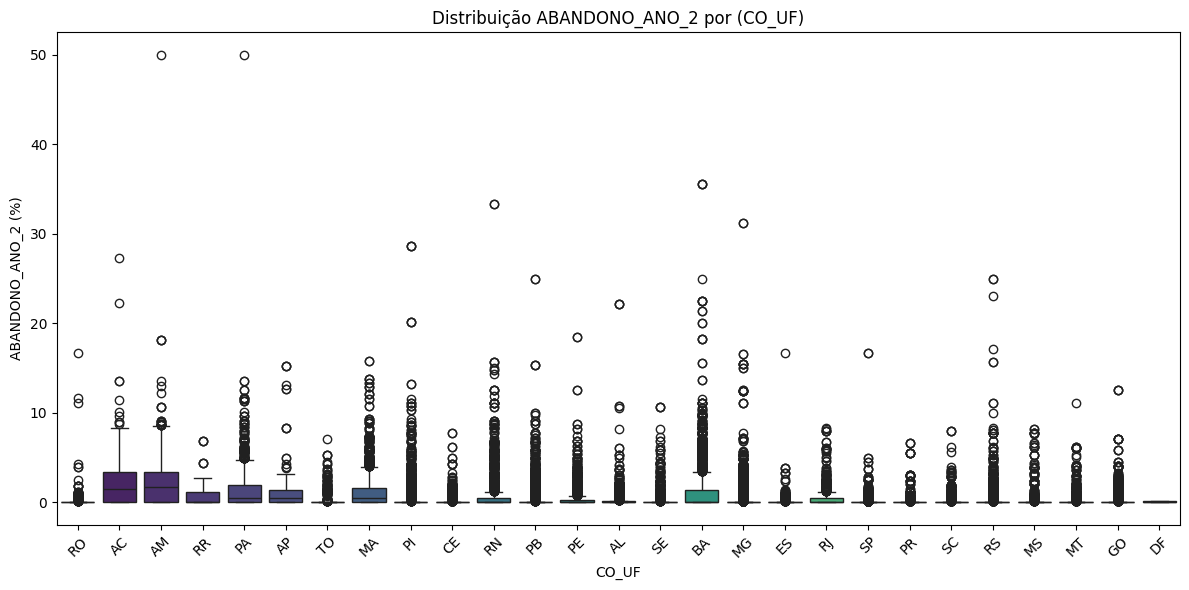

----------------------------------------
Coluna: ABANDONO_ANO_3
Número de exemplares: 54925
Valor máximo: 80.0
Valor mínimo: 0.0
Variância: 3.315595130799685
Desvio padrão: 1.8208775716120194
Distribuição:
count    54925.000000
mean         0.528066
std          1.820878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         80.000000
Name: ABANDONO_ANO_3, dtype: float64
Quantidade de NAs: 10651
Existência de outliers: 1033



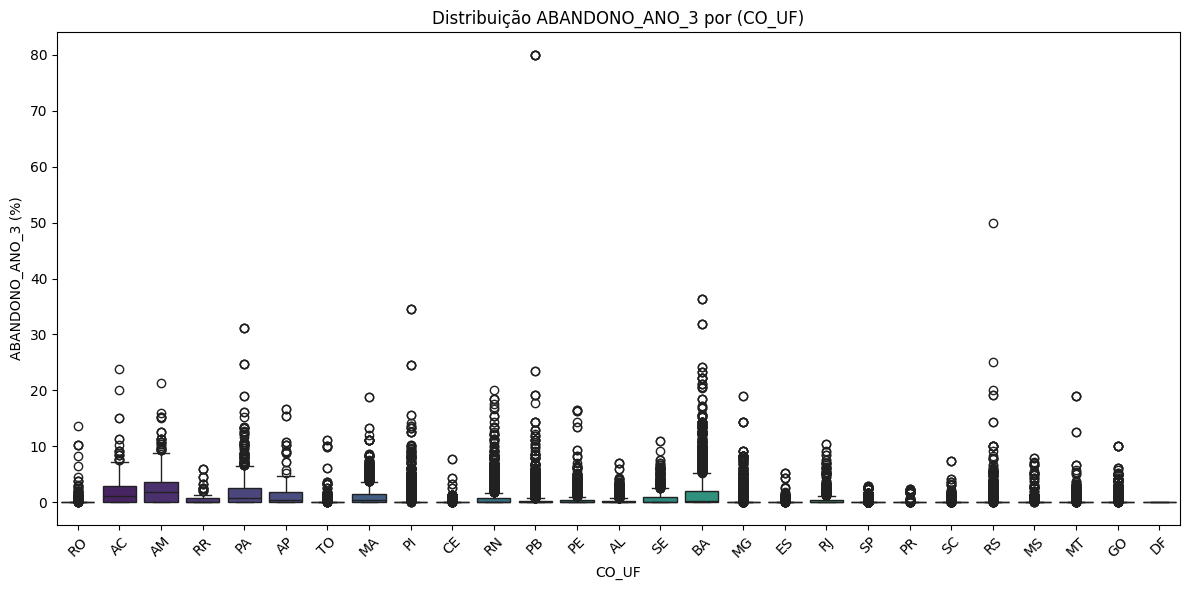

----------------------------------------
Coluna: ABANDONO_ANO_4
Número de exemplares: 55059
Valor máximo: 55.6
Valor mínimo: 0.0
Variância: 4.2320123034978145
Desvio padrão: 2.0571855296734456
Distribuição:
count    55059.000000
mean         0.643982
std          2.057186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max         55.600000
Name: ABANDONO_ANO_4, dtype: float64
Quantidade de NAs: 10517
Existência de outliers: 1156



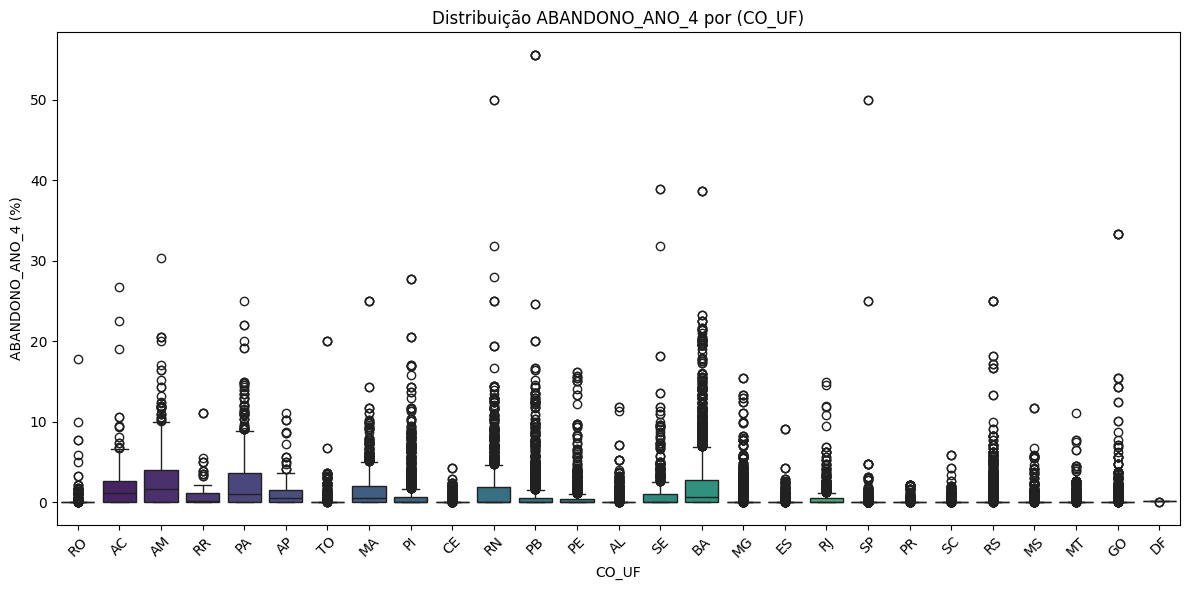

----------------------------------------
Coluna: ABANDONO_ANO_5
Número de exemplares: 54957
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 5.090179836137409
Desvio padrão: 2.2561426896669032
Distribuição:
count    54957.000000
mean         0.726315
std          2.256143
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max        100.000000
Name: ABANDONO_ANO_5, dtype: float64
Quantidade de NAs: 10619
Existência de outliers: 1005



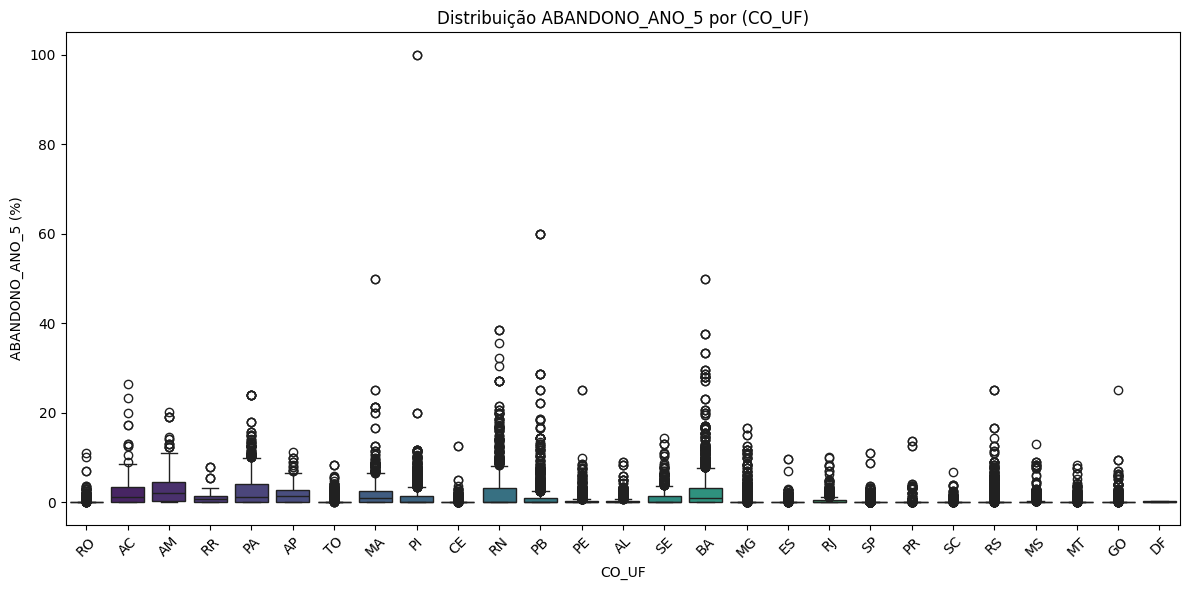

----------------------------------------
Coluna: ABANDONO_ANO_6
Número de exemplares: 52115
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 11.702089729660814
Desvio padrão: 3.4208317306849243
Distribuição:
count    52115.000000
mean         1.442358
std          3.420832
min          0.000000
25%          0.000000
50%          0.000000
75%          1.300000
max        100.000000
Name: ABANDONO_ANO_6, dtype: float64
Quantidade de NAs: 13461
Existência de outliers: 1211



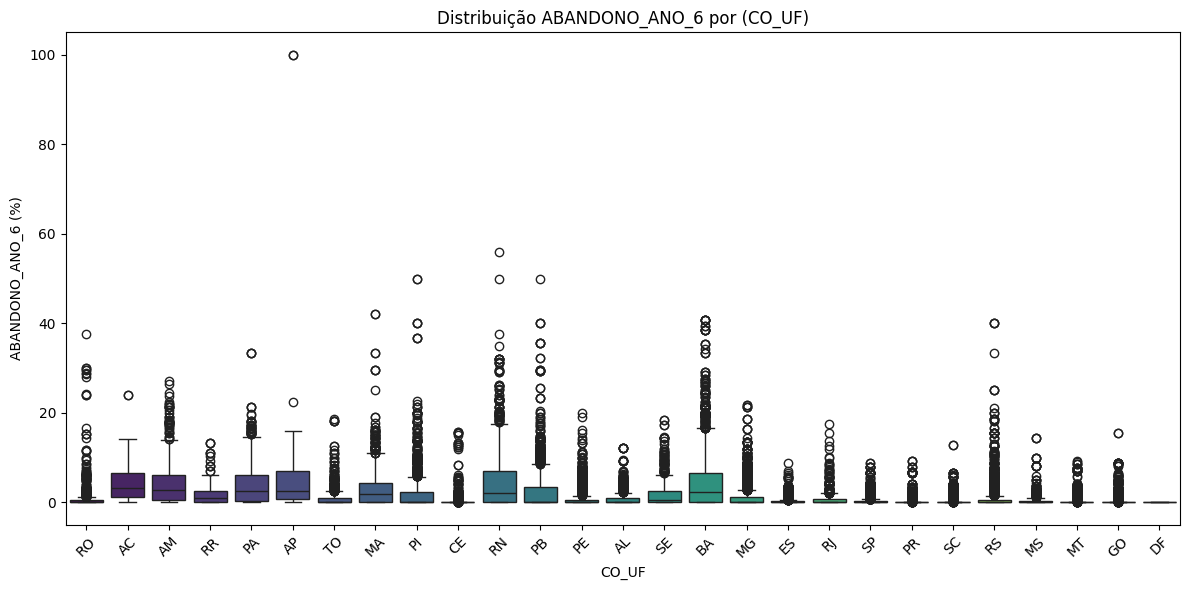

----------------------------------------
Coluna: ABANDONO_ANO_7
Número de exemplares: 52063
Valor máximo: 75.0
Valor mínimo: 0.0
Variância: 16.90513421214011
Desvio padrão: 4.111585364812472
Distribuição:
count    52063.000000
mean         2.026091
std          4.111585
min          0.000000
25%          0.000000
50%          0.000000
75%          2.200000
max         75.000000
Name: ABANDONO_ANO_7, dtype: float64
Quantidade de NAs: 13513
Existência de outliers: 1227



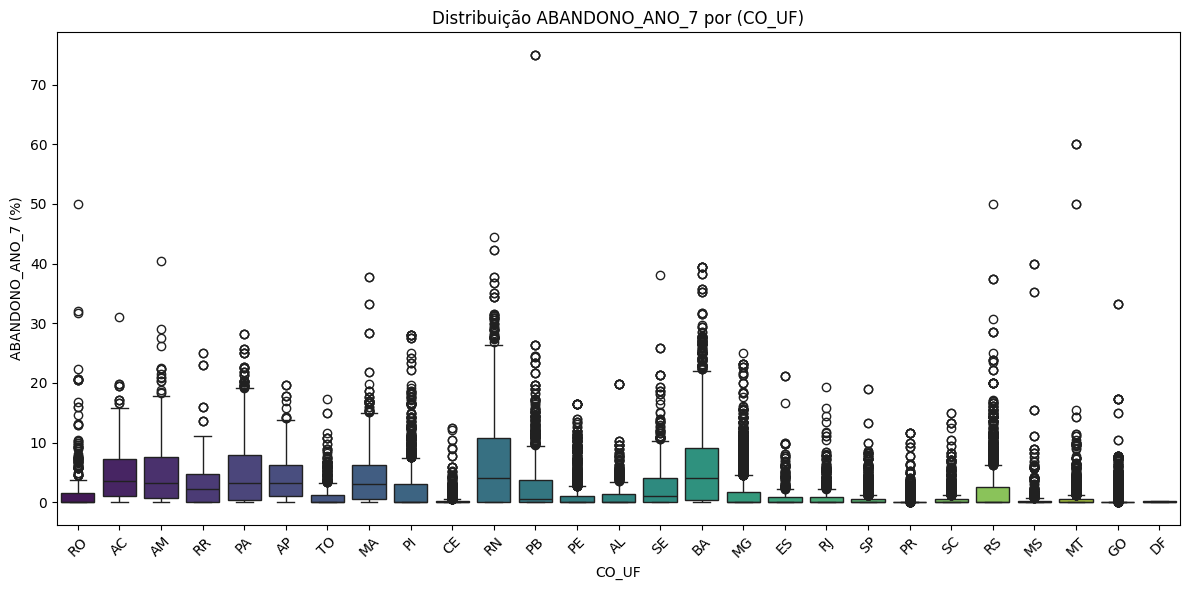

----------------------------------------
Coluna: ABANDONO_ANO_8
Número de exemplares: 51984
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 16.91303070330715
Desvio padrão: 4.112545525985961
Distribuição:
count    51984.000000
mean         2.148219
std          4.112546
min          0.000000
25%          0.000000
50%          0.000000
75%          2.600000
max        100.000000
Name: ABANDONO_ANO_8, dtype: float64
Quantidade de NAs: 13592
Existência de outliers: 1158



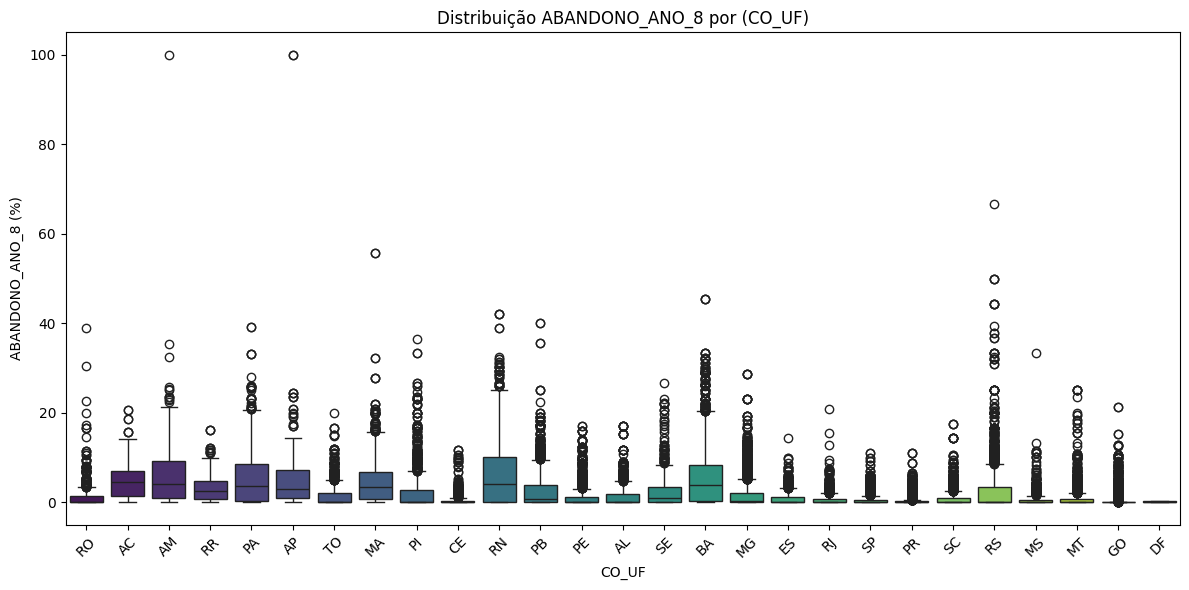

----------------------------------------
Coluna: ABANDONO_ANO_9
Número de exemplares: 51920
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 15.315503896948968
Desvio padrão: 3.9135027656753953
Distribuição:
count    51920.000000
mean         2.071281
std          3.913503
min          0.000000
25%          0.000000
50%          0.000000
75%          2.600000
max        100.000000
Name: ABANDONO_ANO_9, dtype: float64
Quantidade de NAs: 13656
Existência de outliers: 1060



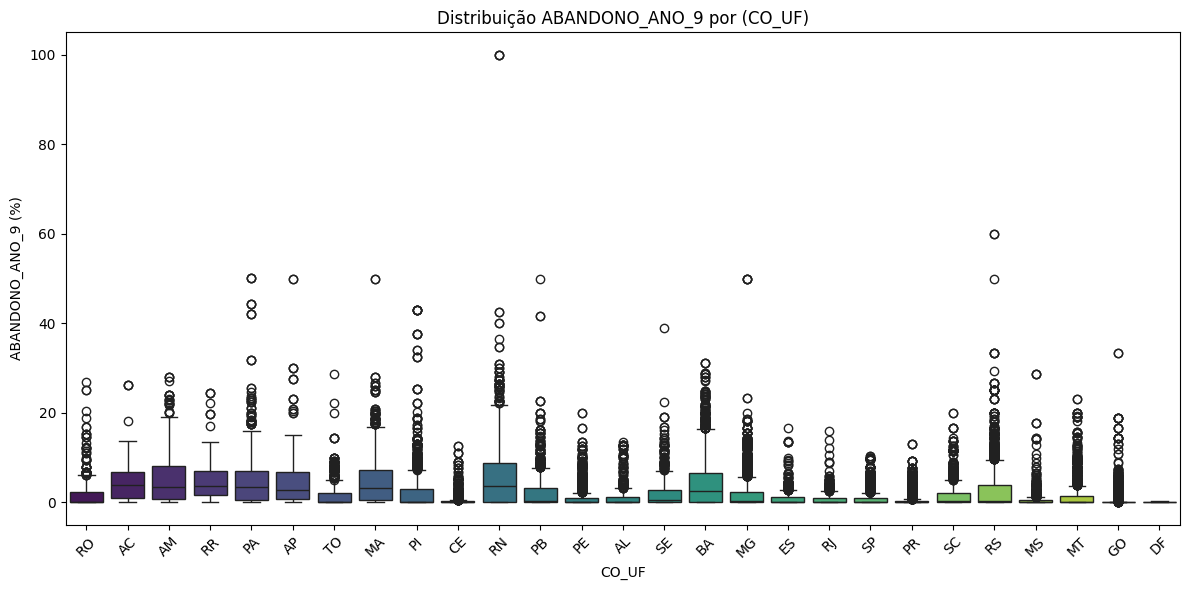

----------------------------------------
Coluna: ABANDONO_TOTAL_MEDIO
Número de exemplares: 42048
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 52.35425076499317
Desvio padrão: 7.235623730197222
Distribuição:
count    42048.000000
mean         5.122596
std          7.235624
min          0.000000
25%          0.000000
50%          2.300000
75%          7.100000
max        100.000000
Name: ABANDONO_TOTAL_MEDIO, dtype: float64
Quantidade de NAs: 23528
Existência de outliers: 967



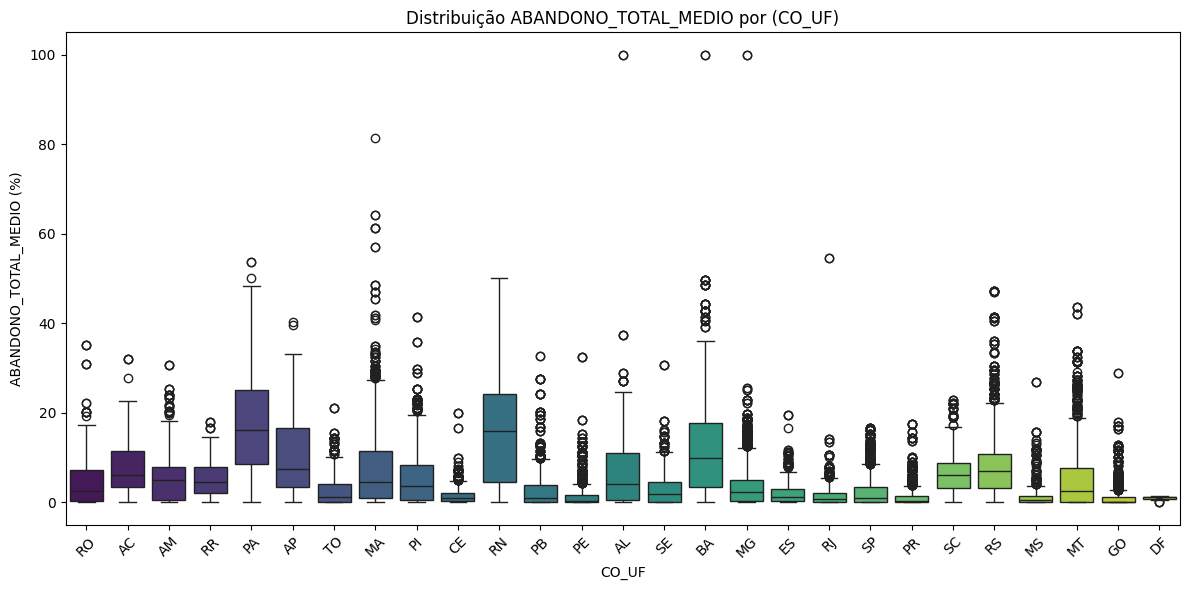

----------------------------------------
Coluna: ABANDONO_MEDIO_1
Número de exemplares: 41749
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 50.92750705560111
Desvio padrão: 7.136351102321207
Distribuição:
count    41749.000000
mean         4.576720
std          7.136351
min          0.000000
25%          0.000000
50%          1.600000
75%          6.300000
max        100.000000
Name: ABANDONO_MEDIO_1, dtype: float64
Quantidade de NAs: 23827
Existência de outliers: 892



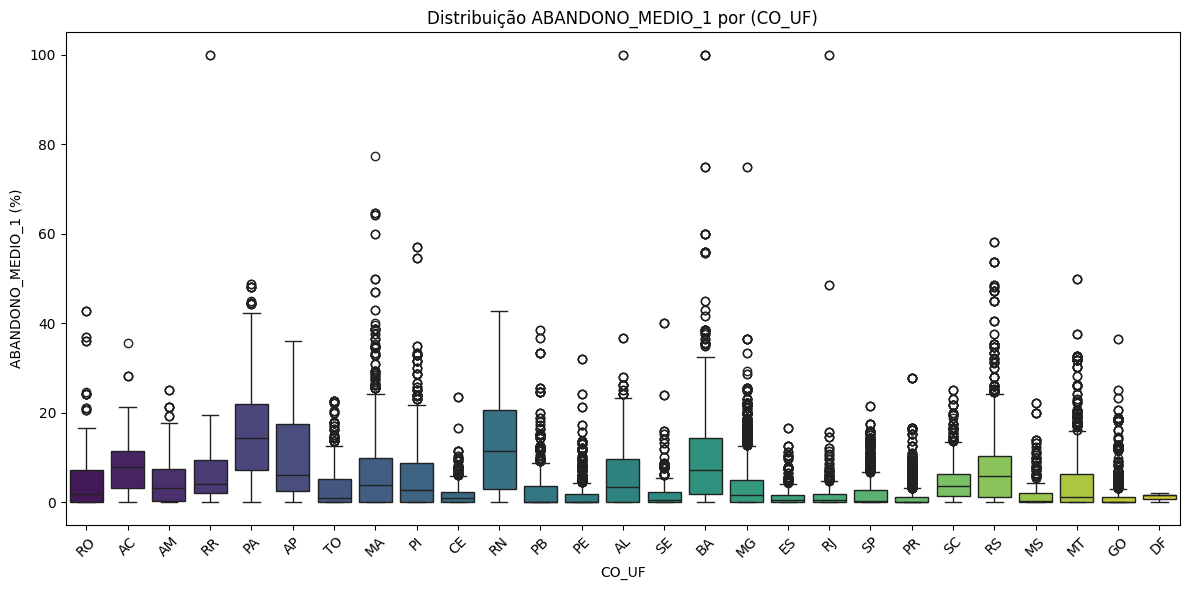

----------------------------------------
Coluna: ABANDONO_MEDIO_2
Número de exemplares: 41608
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 77.42147744509957
Desvio padrão: 8.798947519169527
Distribuição:
count    41608.000000
mean         5.995227
std          8.798948
min          0.000000
25%          0.000000
50%          2.400000
75%          8.300000
max        100.000000
Name: ABANDONO_MEDIO_2, dtype: float64
Quantidade de NAs: 23968
Existência de outliers: 999



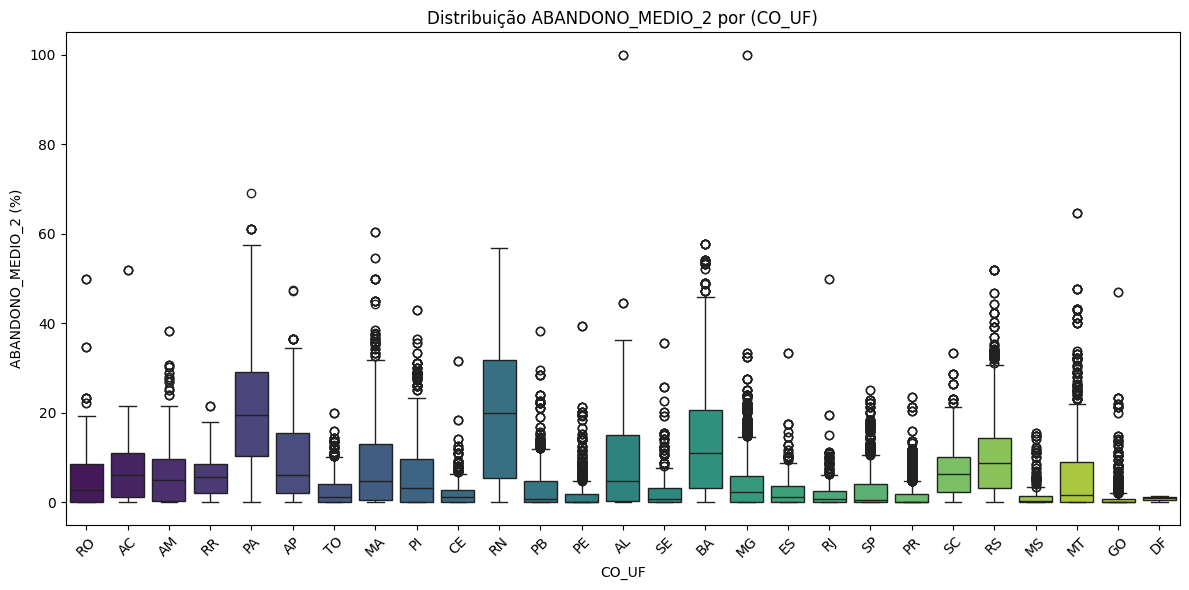

----------------------------------------
Coluna: ABANDONO_MEDIO_3
Número de exemplares: 41502
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 55.714114414543275
Desvio padrão: 7.464188798157726
Distribuição:
count    41502.000000
mean         4.668532
std          7.464189
min          0.000000
25%          0.000000
50%          1.400000
75%          6.500000
max        100.000000
Name: ABANDONO_MEDIO_3, dtype: float64
Quantidade de NAs: 24074
Existência de outliers: 957



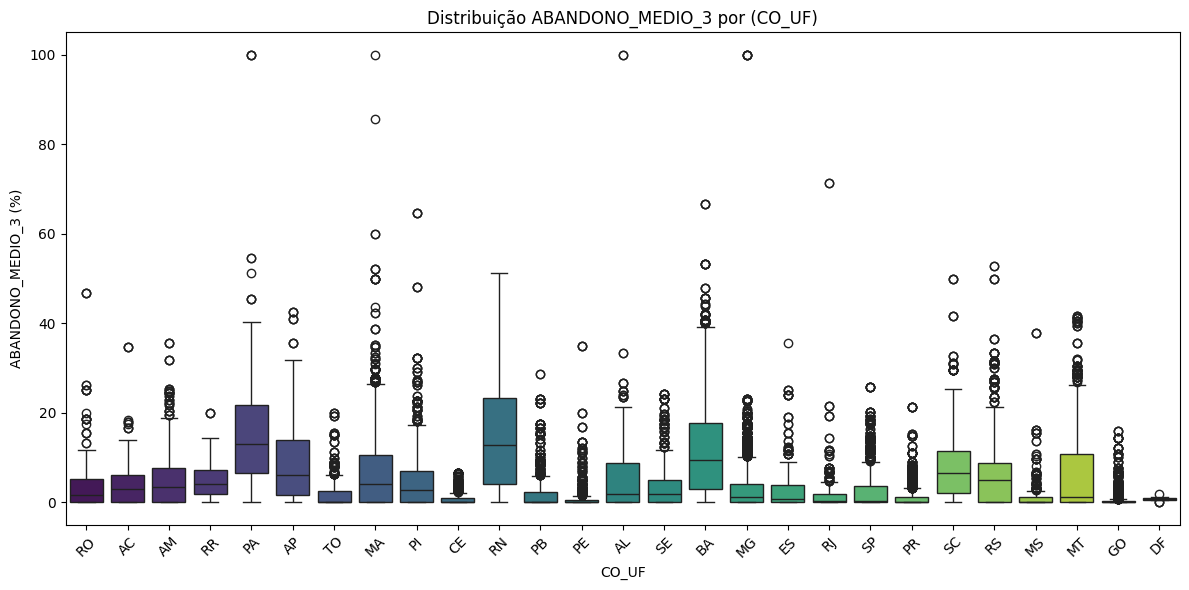

In [43]:
import pandas as pd
import numpy as np


df = pd.read_csv('../data/saeb_data_2021.csv', delimiter=';', encoding='ISO-8859-1', dtype = {
    'NU_ANO_SAEB': 'str',
    'REGIAO': 'str',
    'CO_UF': 'str',
    'CO_MUNICIPIO': 'str',
    'NO_MUNICIPIO': 'str',
    'TP_LOCALIZACAO': 'str',
    'DP_ADIMINSTRATIVA': 'str',
    'APROVACAO_TOTAL_FUNDAMENTAL': 'float',
    'APROVACAO_ANOS_INICIAIS': 'float',
    'APROVACAO_ANOS_FINAIS': 'float',
    'APROVACAO_ANO_1': 'float',
    'APROVACAO_ANO_2': 'float',
    'APROVACAO_ANO_3': 'float',
    'APROVACAO_ANO_4': 'float',
    'APROVACAO_ANO_5': 'float',
    'APROVACAO_ANO_6': 'float',
    'APROVACAO_ANO_7': 'float',
    'APROVACAO_ANO_8': 'float',
    'APROVACAO_ANO_9': 'float',
    'APROVACAO_TOTAL_MEDIO': 'float',
    'APROVACAO_MEDIO_1': 'float',
    'APROVACAO_MEDIO_2': 'float',
    'APROVACAO_MEDIO_3': 'float',
    'REPROVACAO_TOTAL_FUNDAMENTAL': 'float',
    'REPROVACAO_ANOS_INICIAIS': 'float',
    'REPROVACAO_ANOS_FINAIS': 'float',
    'REPROCACAO_ANO_1': 'float',
    'REPROVACAO_ANO_2': 'float',
    'REPROVACAO_ANO_3': 'float',
    'REPROVACAO_ANO_4': 'float',
    'REPROVACAO_ANO_5': 'float',
    'REPROVACAO_ANO_6': 'float',
    'REPROVACAO_ANO_7': 'float',
    'REPROVACAO_ANO_8': 'float',
    'REPROVACAO_ANO_9': 'float',
    'REPROVACAO_TOTAL_MEDIO': 'float',
    'REPROVACAO_MEDIO_1': 'float',
    'REPROVACAO_MEDIO_2': 'float',
    'REPROVACAO_MEDIO_3': 'float',
    'ABANDONO_TOTAL_FUNDAMENTAL': 'float',
    'ABANDONO_ANOS_INICIAIS': 'float',
    'ABANDONO_ANOS_FINAIS': 'float',
    'ABANDONO_ANO_1': 'float',
    'ABANDONO_ANO_2': 'float',
    'ABANDONO_ANO_3': 'float',
    'ABANDONO_ANO_4': 'float',
    'ABANDONO_ANO_5': 'float',
    'ABANDONO_ANO_6': 'float',
    'ABANDONO_ANO_7': 'float',
    'ABANDONO_ANO_8': 'float',
    'ABANDONO_ANO_9': 'float',
    'ABANDONO_TOTAL_MEDIO': 'float',
    'ABANDONO_MEDIO_1': 'float',
    'ABANDONO_MEDIO_2': 'float',
    'ABANDONO_MEDIO_3': 'float'
})


for col in df.select_dtypes(include=[np.number]):
    describe_column(df[col])
    boxplot_by_uf(df, df[col], 'CO_UF')


# **Indicadores Econômicos**

----------------------------------------
Coluna: QTD_ALUNOS_INSE
Número de exemplares: 82830
Valor máximo: 233700
Valor mínimo: 0
Variância: 6258566.686589134
Desvio padrão: 2501.712750614893
Distribuição:
count     82830.000000
mean        357.670433
std        2501.712751
min           0.000000
25%           0.000000
50%          72.000000
75%         244.000000
max      233700.000000
Name: QTD_ALUNOS_INSE, dtype: float64
Quantidade de NAs: 0
Existência de outliers: 409



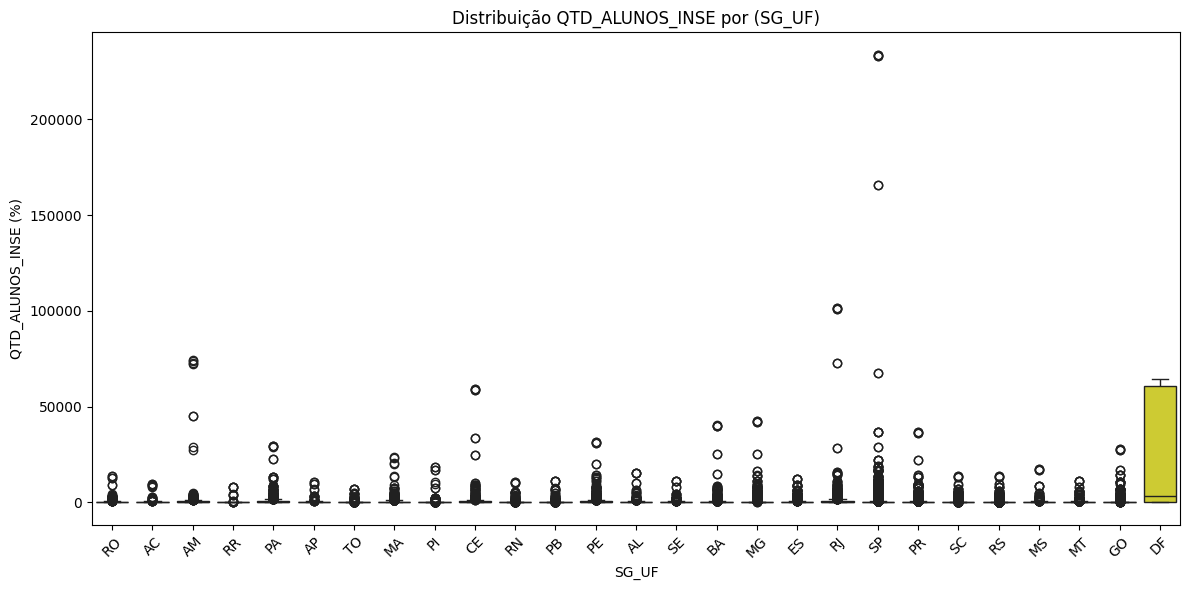

----------------------------------------
Coluna: MEDIA_INSE
Número de exemplares: 82830
Valor máximo: 6.49
Valor mínimo: 0.0
Variância: 5.209646859629305
Desvio padrão: 2.282465083989086
Distribuição:
count    82830.000000
mean         3.204355
std          2.282465
min          0.000000
25%          0.000000
50%          4.350000
75%          5.040000
max          6.490000
Name: MEDIA_INSE, dtype: float64
Quantidade de NAs: 0
Existência de outliers: 0



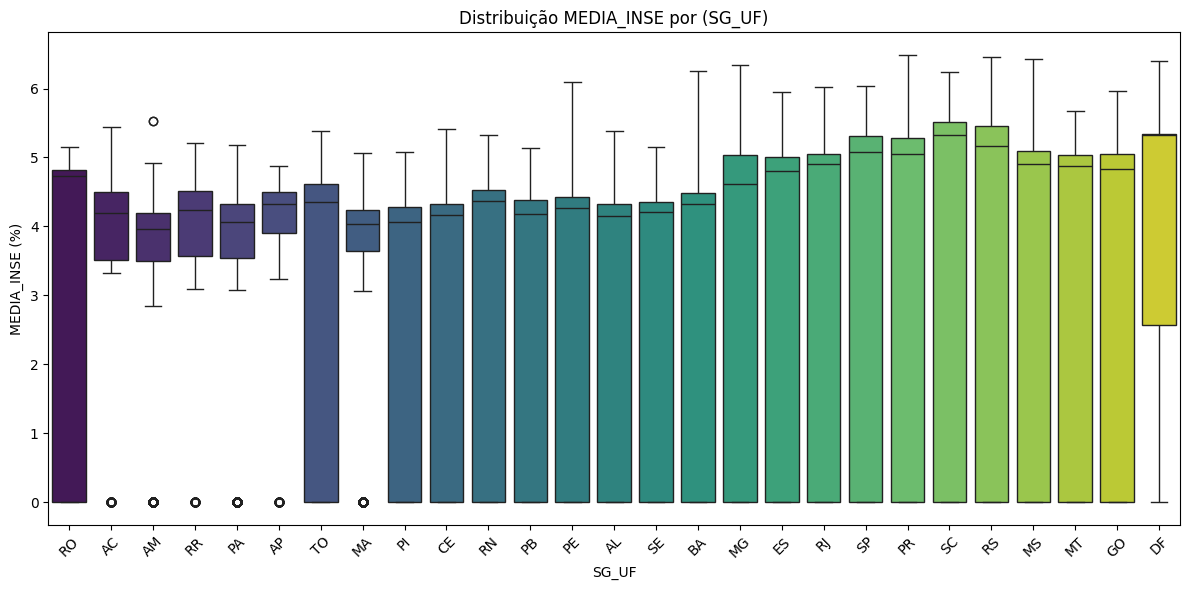

----------------------------------------
Coluna: PC_NIVEL_1
Número de exemplares: 55585
Valor máximo: 80.03
Valor mínimo: 0.0
Variância: 15.431938769174684
Desvio padrão: 3.928350642340203
Distribuição:
count    55585.000000
mean         2.412118
std          3.928351
min          0.000000
25%          0.000000
50%          0.740000
75%          3.450000
max         80.030000
Name: PC_NIVEL_1, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 1060



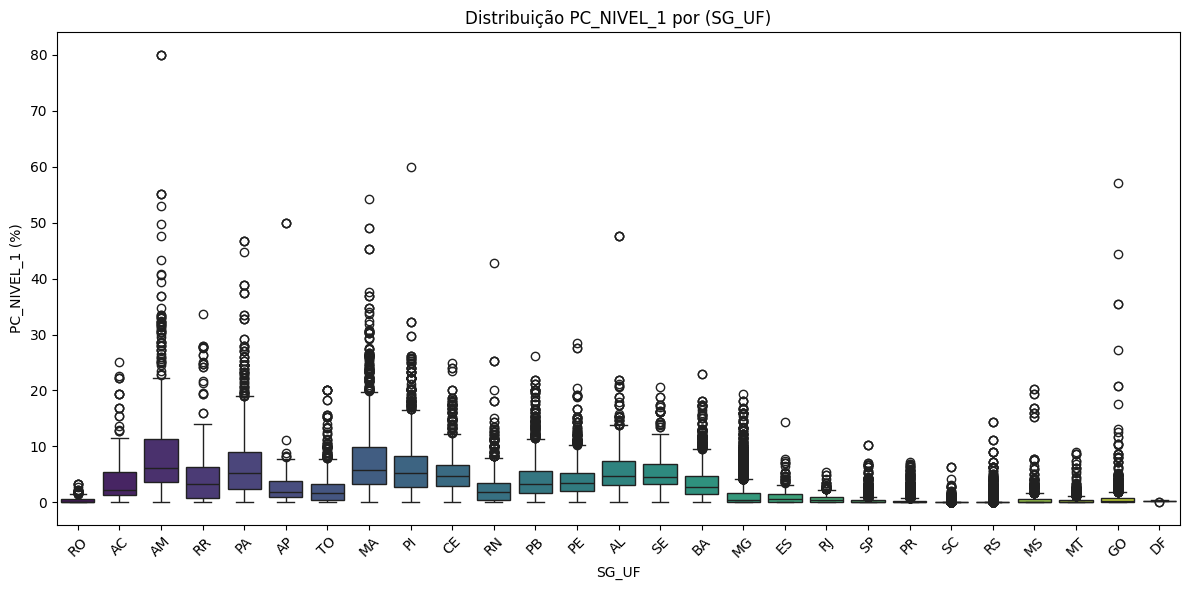

----------------------------------------
Coluna: PC_NIVEL_2
Número de exemplares: 55585
Valor máximo: 86.54
Valor mínimo: 0.0
Variância: 217.23341211723871
Desvio padrão: 14.73884025686006
Distribuição:
count    55585.000000
mean        17.540981
std         14.738840
min          0.000000
25%          4.610000
50%         13.270000
75%         28.920000
max         86.540000
Name: PC_NIVEL_2, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 154



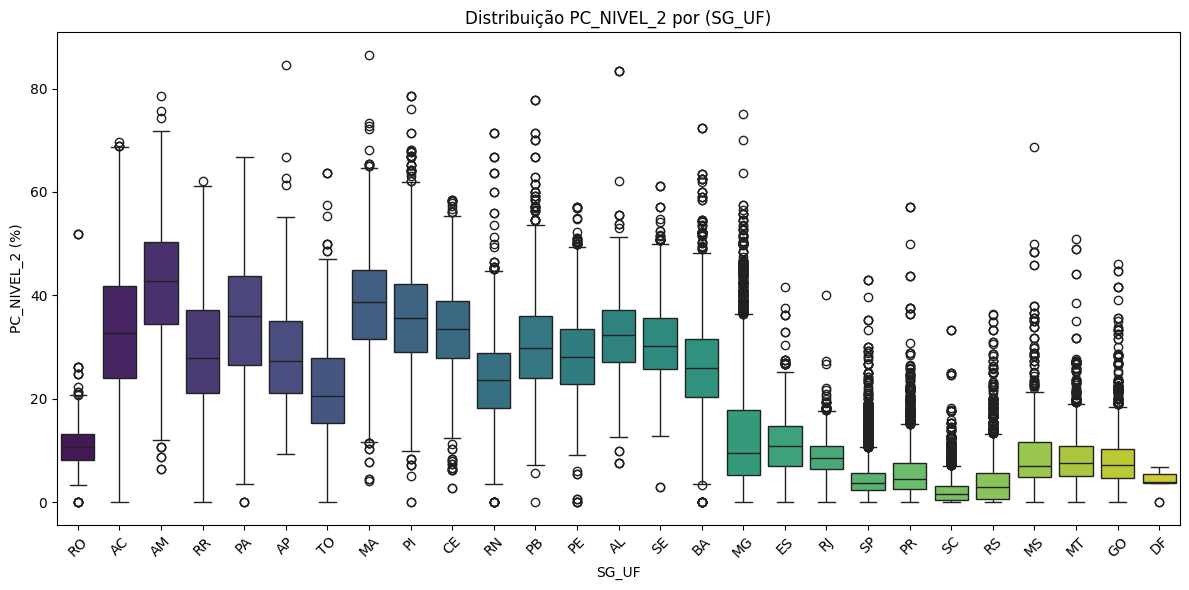

----------------------------------------
Coluna: PC_NIVEL_3
Número de exemplares: 55585
Valor máximo: 77.78
Valor mínimo: 0.0
Variância: 77.58998942993568
Desvio padrão: 8.808518004178438
Distribuição:
count    55585.000000
mean        18.359204
std          8.808518
min          0.000000
25%         11.110000
50%         19.060000
75%         25.180000
max         77.780000
Name: PC_NIVEL_3, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 173



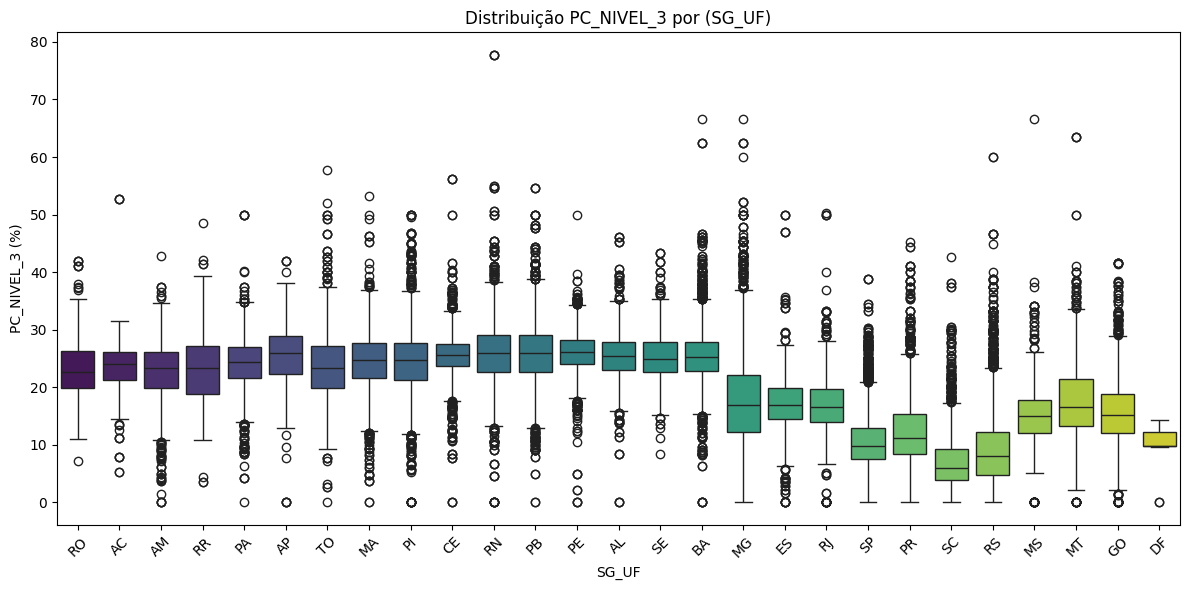

----------------------------------------
Coluna: PC_NIVEL_4
Número de exemplares: 55585
Valor máximo: 100.0
Valor mínimo: 0.0
Variância: 45.913526919750986
Desvio padrão: 6.775952104298774
Distribuição:
count    55585.000000
mean        21.135259
std          6.775952
min          0.000000
25%         17.120000
50%         21.270000
75%         25.050000
max        100.000000
Name: PC_NIVEL_4, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 661



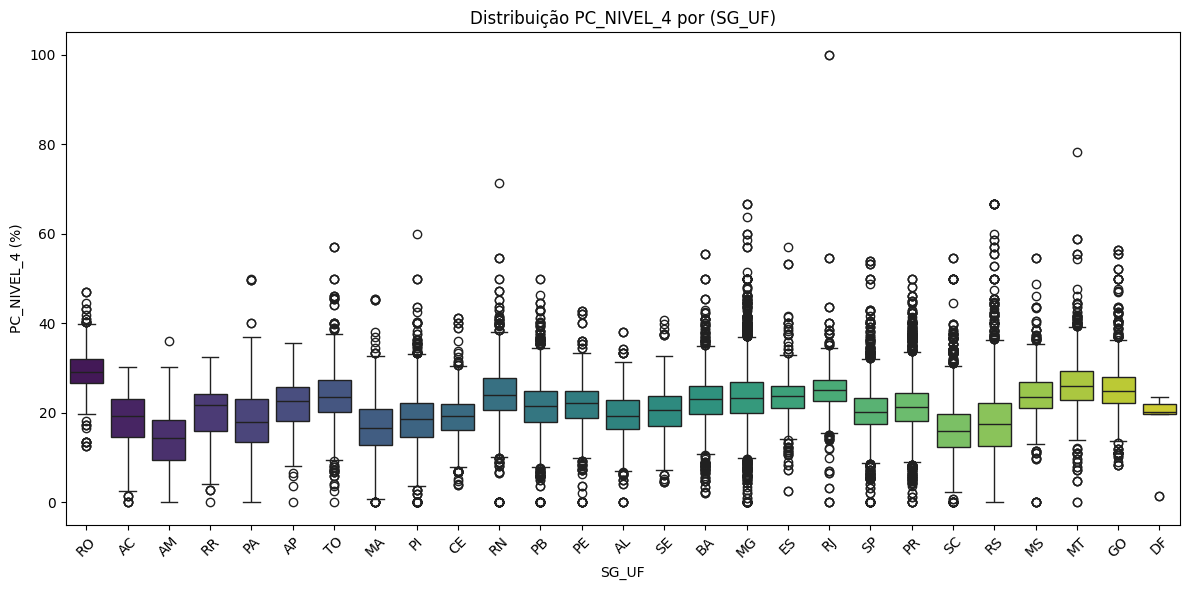

----------------------------------------
Coluna: PC_NIVEL_5
Número de exemplares: 55585
Valor máximo: 80.0
Valor mínimo: 0.0
Variância: 78.62077960082354
Desvio padrão: 8.866835940786519
Distribuição:
count    55585.000000
mean        18.869172
std          8.866836
min          0.000000
25%         11.720000
50%         19.170000
75%         25.670000
max         80.000000
Name: PC_NIVEL_5, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 206



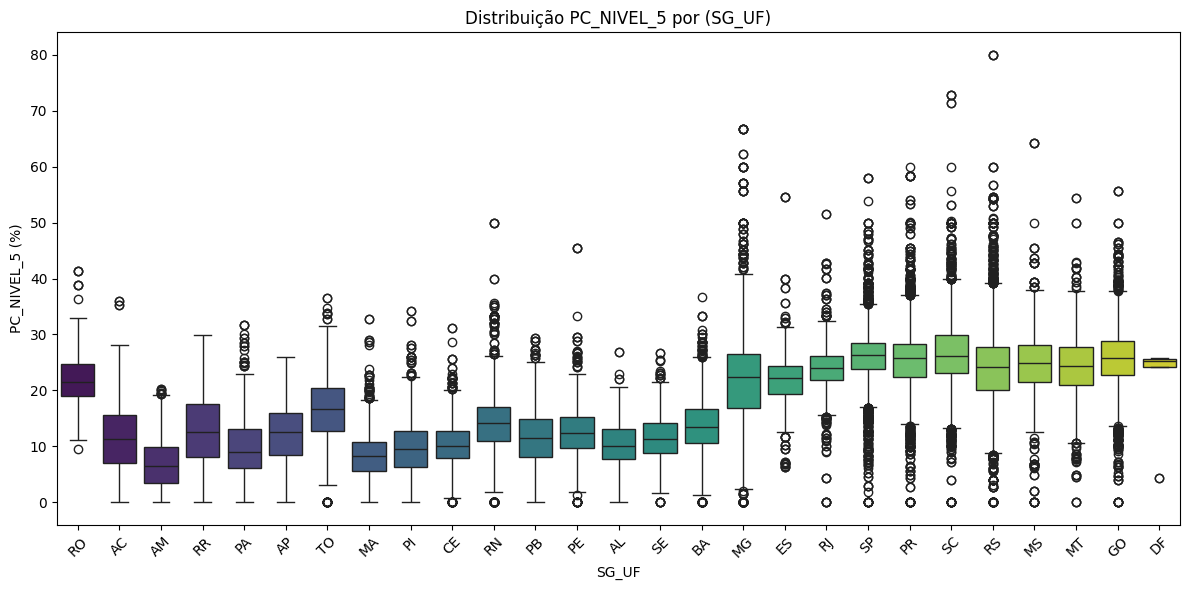

----------------------------------------
Coluna: PC_NIVEL_6
Número de exemplares: 55585
Valor máximo: 83.33
Valor mínimo: 0.0
Variância: 86.06678351873099
Desvio padrão: 9.27721852274328
Distribuição:
count    55585.000000
mean        12.671134
std          9.277219
min          0.000000
25%          4.690000
50%         10.750000
75%         19.970000
max         83.330000
Name: PC_NIVEL_6, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 225



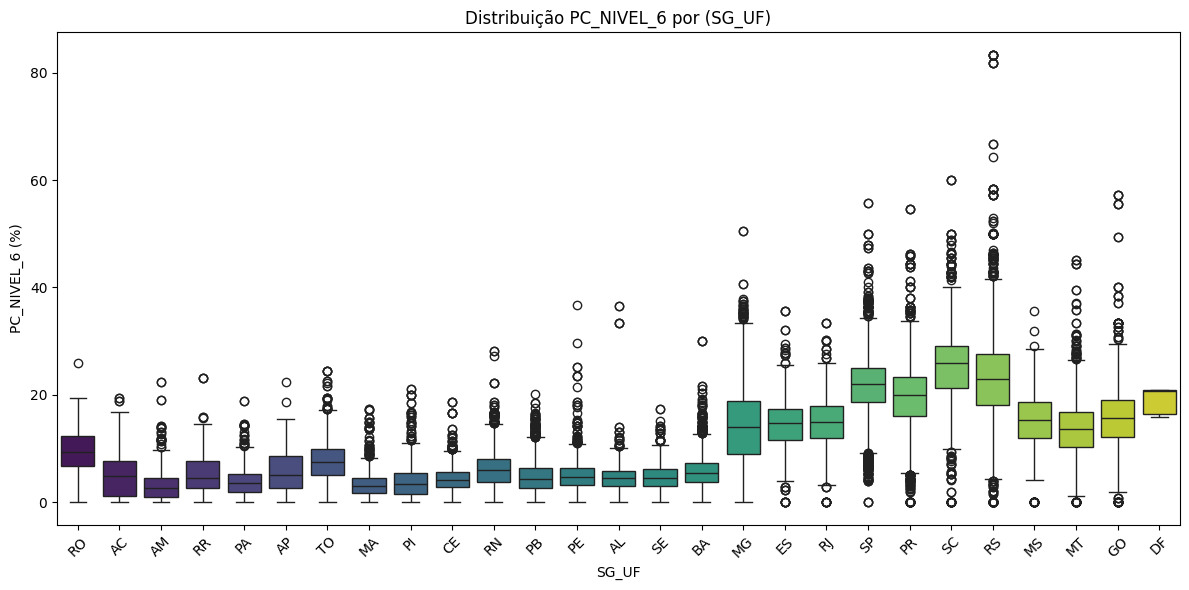

----------------------------------------
Coluna: PC_NIVEL_7
Número de exemplares: 55585
Valor máximo: 73.54
Valor mínimo: 0.0
Variância: 69.54890077545313
Desvio padrão: 8.33959835816169
Distribuição:
count    55585.000000
mean         8.222322
std          8.339598
min          0.000000
25%          1.680000
50%          5.190000
75%         13.120000
max         73.540000
Name: PC_NIVEL_7, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 714



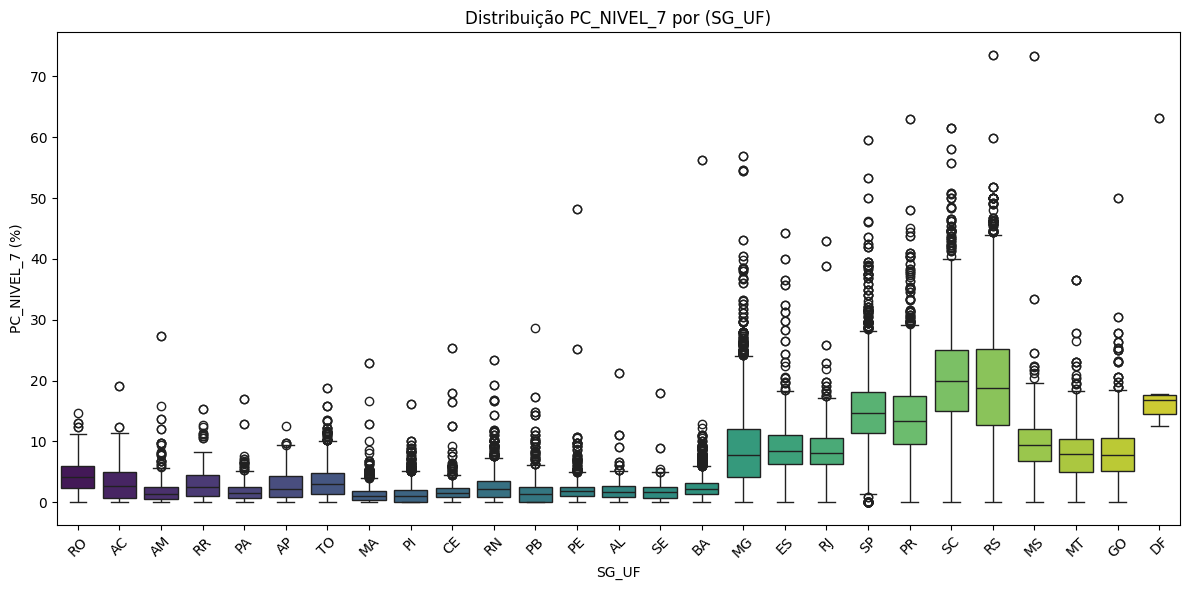

----------------------------------------
Coluna: PC_NIVEL_8
Número de exemplares: 55585
Valor máximo: 24.67
Valor mínimo: 0.0
Variância: 1.9130845617238668
Desvio padrão: 1.3831430011838497
Distribuição:
count    55585.000000
mean         0.789752
std          1.383143
min          0.000000
25%          0.000000
50%          0.190000
75%          1.130000
max         24.670000
Name: PC_NIVEL_8, dtype: float64
Quantidade de NAs: 27245
Existência de outliers: 1035



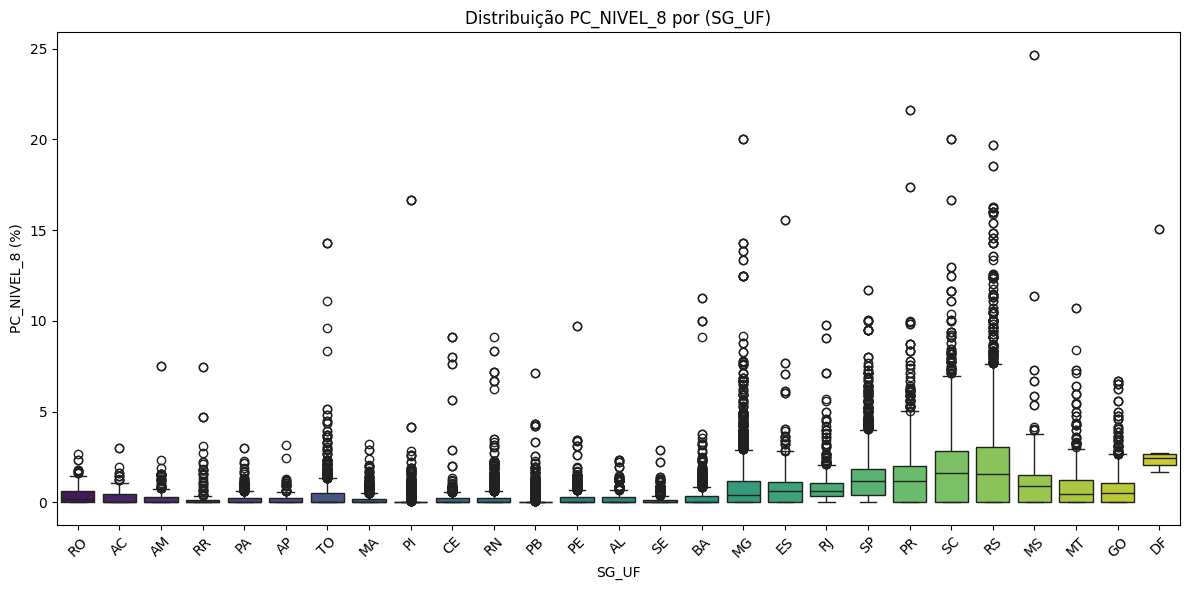

In [44]:
import pandas as pd
import numpy as np


df = pd.read_csv('..data/inse_data_2021.csv', delimiter=';', encoding='ISO-8859-1', dtype = {
    'NU_ANO_SAEB': 'str',
    'CO_UF': 'str',
    'SG_UF': 'str',
    'NO_UF': 'str',
    'CO_MUNICIPIO': 'str',
    'NO_MUNICIPIO': 'str',
    'TP_TIPO_REDE': 'str',
    'TP_LOCALIZACAO': 'str',
    'TP_CAPITAL': 'str',
    'QTD_ALUNOS_INSE': 'int',
    'MEDIA_INSE': 'float',
    'PC_NIVEL_1': 'float',
    'PC_NIVEL_2': 'float',
    'PC_NIVEL_3': 'float',
    'PC_NIVEL_4': 'float',
    'PC_NIVEL_5': 'float',
    'PC_NIVEL_6': 'float',
    'PC_NIVEL_7': 'float',
    'PC_NIVEL_8': 'float'
})

for col in df.select_dtypes(include=[np.number]):
    describe_column(df[col])
    boxplot_by_uf(df, df[col], 'SG_UF')
